In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from scipy.stats import shapiro
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv('co2_emissions (1).csv', sep = ';')

In [3]:
data.head(8)

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   
5  ACURA         RLX      MID-SIZE          3.5          6           AS   
6  ACURA          TL      MID-SIZE          3.5          6           AS   
7  ACURA      TL AWD      MID-SIZE          3.7          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   
5         Z                   11.9                   7.7   
6         Z                   11.8                   8.1   
7         Z                   12.8                   9.0   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244  
5                            10.0                          28            230  
6                            10.1                          28            232  
7                            11.1                          25            255

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

# Exploratory Data Analysis

Preparing the Dataset

In [5]:
#Data Dimensions
data.shape

(7385, 12)

In this dataset we have 7385 records across 12 features

In [6]:
#data types
data.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

The dataset contains 5 object columns, 3 int column and 4 float columns

In [7]:
#Missing Values
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})

In [8]:
missing_value.sort_values(by='Percentage', ascending=False)

Missing Value  Percentage
make                                        0         0.0
model                                       0         0.0
vehicle_class                               0         0.0
engine_size                                 0         0.0
cylinders                                   0         0.0
transmission                                0         0.0
fuel_type                                   0         0.0
fuel_consumption_city                       0         0.0
fuel_consumption_hwy                        0         0.0
fuel_consumption_comb(l/100km)              0         0.0
fuel_consumption_comb(mpg)                  0         0.0
co2_emissions                               0         0.0

There are no missing values present in this dataset

In [9]:
#Duplicate Data
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1112 duplicated rows in the data


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.reset_index(inplace=True, drop=True)

In [12]:
data.shape

(6273, 12)

Now, the dataset has 6273 records and 12 features with no missing and duplicate values

# Data Understanding

 Summary Statistics

In [13]:
data.describe(include=np.number)

engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  6273.000000  6273.000000            6273.000000           6273.000000   
mean      3.163000     5.620596              12.615591              9.073426   
std       1.365294     1.846424               3.550572              2.277893   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.700000             10.300000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     6273.000000                 6273.000000   
mean                        11.022111                   27.395026   
std                          2.945028                    7.225472   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.700000                   32.000000   
max                         26.100000                   69.000000   

       co2_emissions  
count    6273.000000  
mean      251.247250  
std        59.235396  
min        96.000000  
25%       208.000000  
50%       246.000000  
75%       289.000000  
max       522.000000

1.The average amount of CO2 emitted from cars is 251 g/km
2.Atleast 4 Litres of fuel is consumed be it the car is on city roads or highway
3.About 75% of the cars have 6 or less cylinders
4.The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway

In [14]:
data.describe(include = object)

make      model vehicle_class transmission fuel_type
count   6273       6273          6273         6273      6273
unique    42       2053            16            5         5
top     FORD  F-150 FFV   SUV - SMALL           AS         X
freq     575         32          1004         2720      3030

1.There are a total of 42 different car companies with 2053 different car models
2.Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most
3.4 different types of fuels used by cars have been identified and fuel X seems to be the most famous
4.Most of the cars have AS transmission

# Correlation

In [15]:
data_num_features = data.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')


Text(0.5, 1.0, 'Correlation')

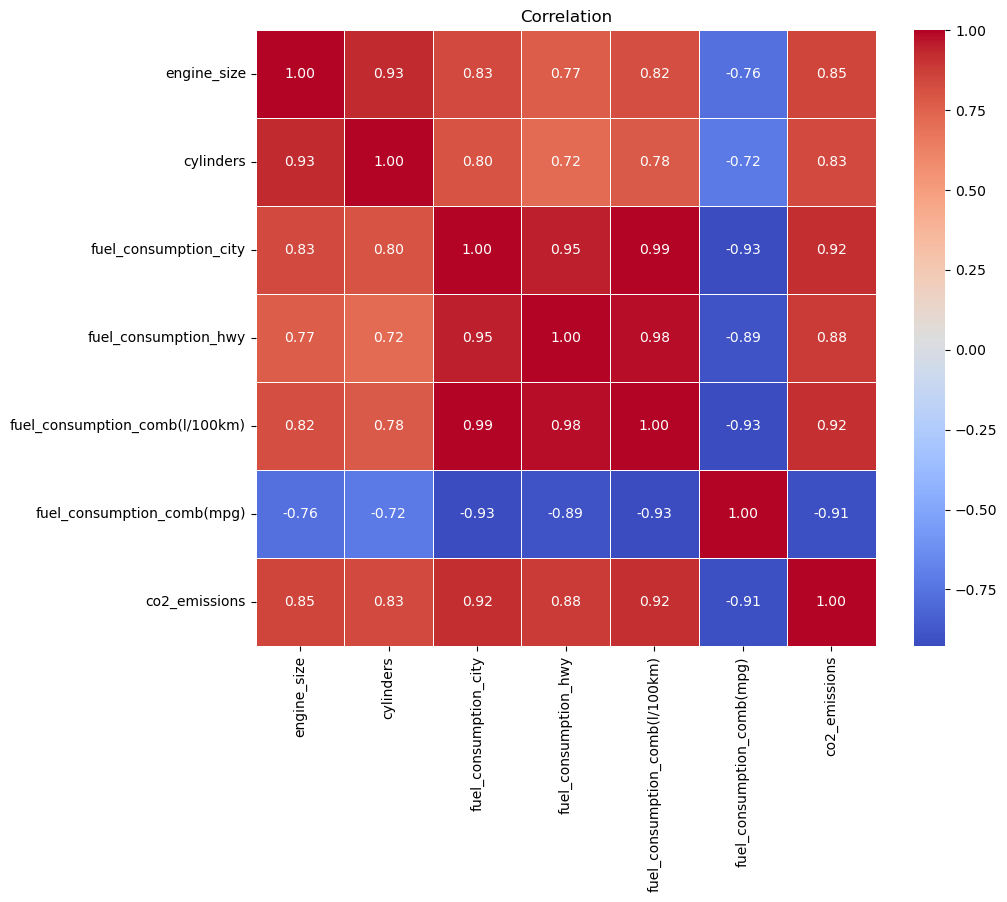

In [16]:
corr = data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

# FREQUENCY DISTRIBUTION OF DIFFFRENT FEATURES

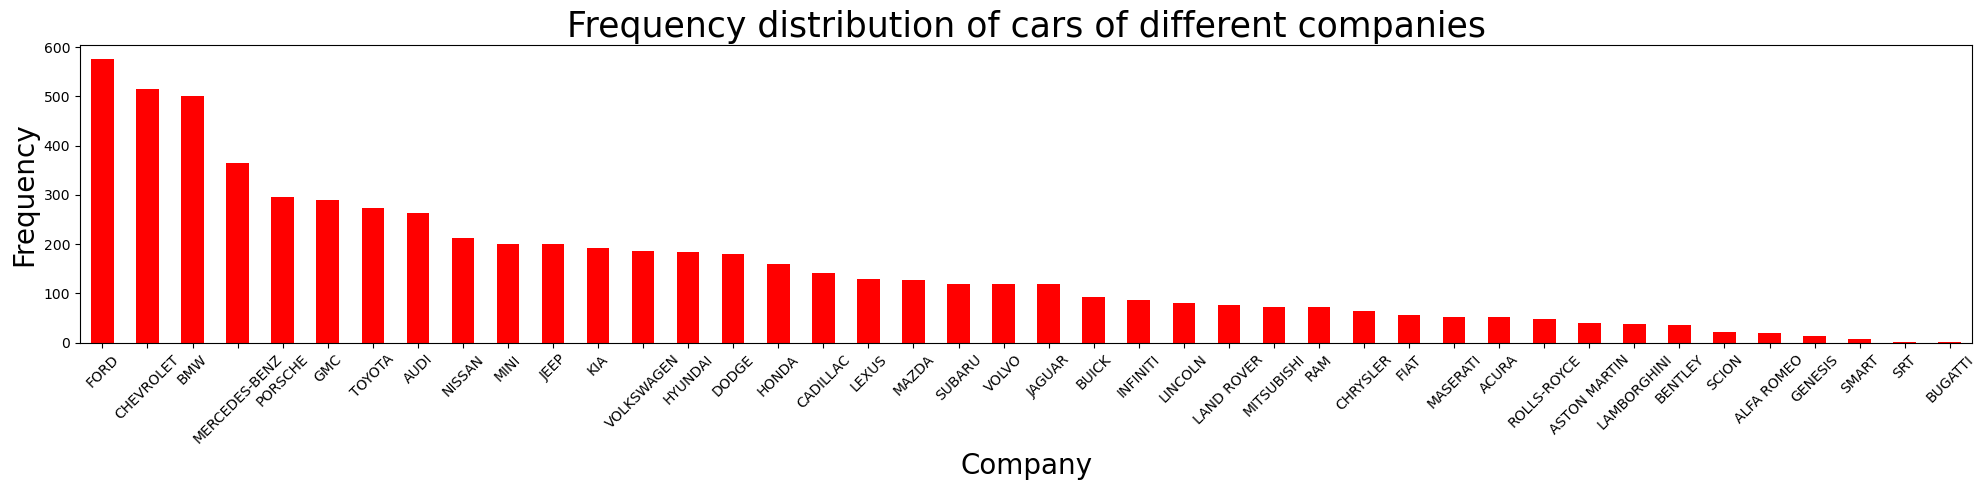

In [17]:
# MAKE
plt.figure(figsize=(20,5))

data.groupby('make')['make'].count().sort_values(ascending=False).plot(kind='bar',color='red')

plt.title('Frequency distribution of cars of different companies', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

most no of   cars are made by ford

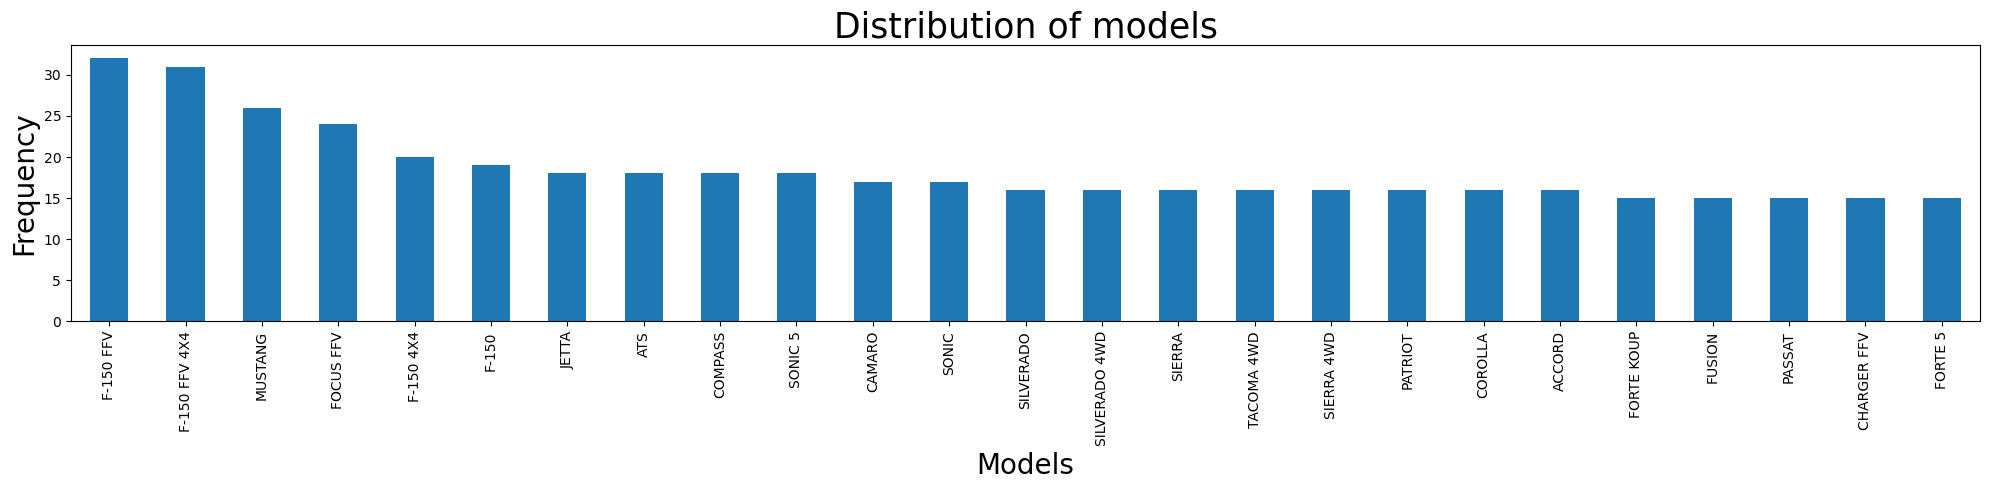

In [18]:
# MODEL
plt.figure(figsize=(20,5))

data.groupby('model')['model'].count().sort_values(ascending=False)[:25].plot(kind='bar')

plt.title('Distribution of models', fontsize=25)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The F-150 FFV is amongst the most famous model

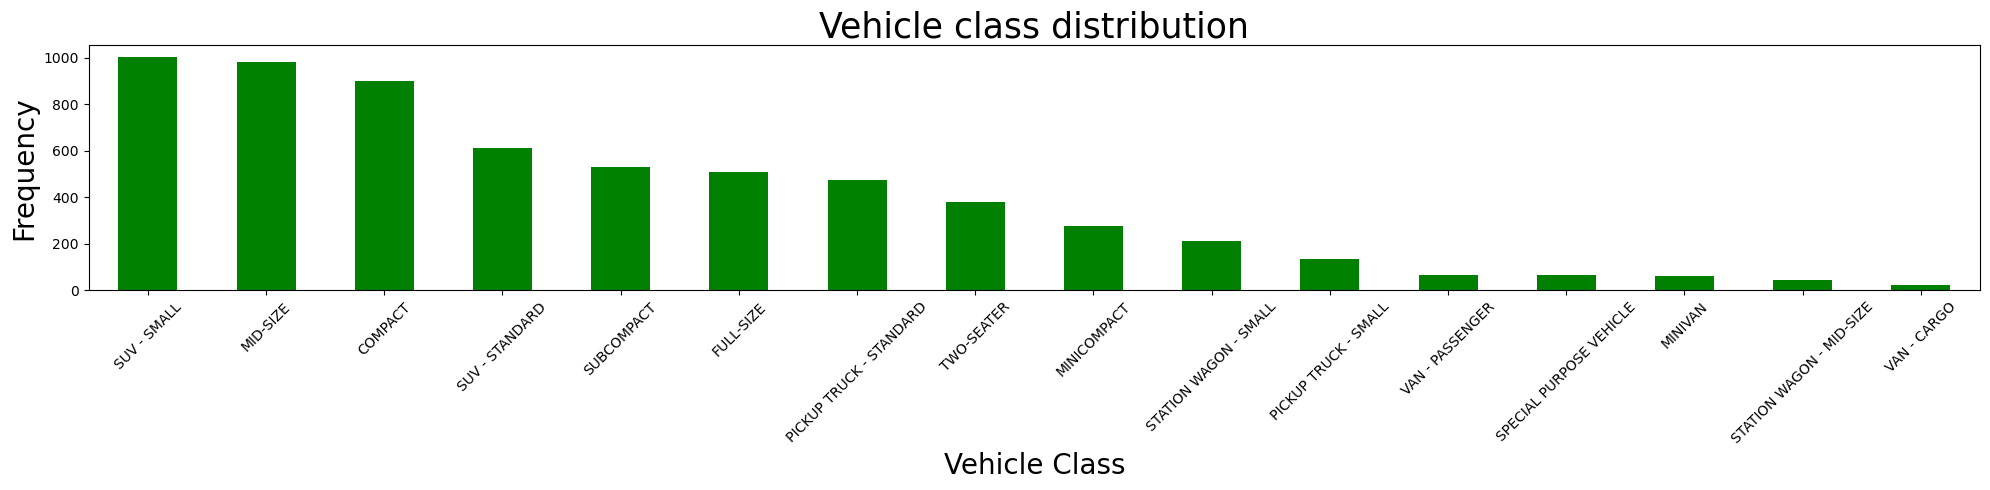

In [19]:
# Vehicle Class

plt.figure(figsize=(20,5))

data.groupby('vehicle_class')['vehicle_class'].count().sort_values(ascending=False).plot(kind='bar', color='green')

plt.title('Vehicle class distribution', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SUV-Small is the preferred class of vehicle

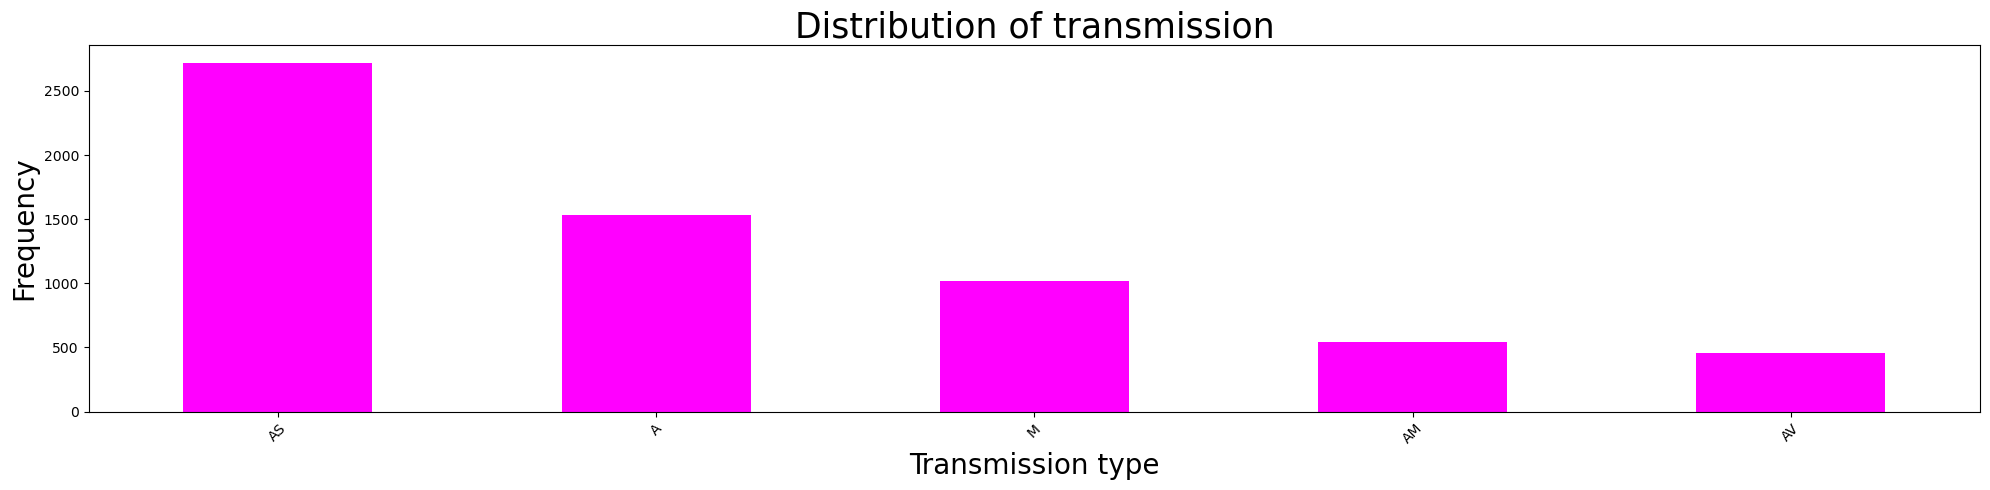

In [20]:
# Transmission

plt.figure(figsize=(20,5))

data.groupby('transmission')['transmission'].count().sort_values(ascending=False).plot(kind='bar', color='magenta')

plt.title('Distribution of transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 More than 1400 cars have AS and A transmission types

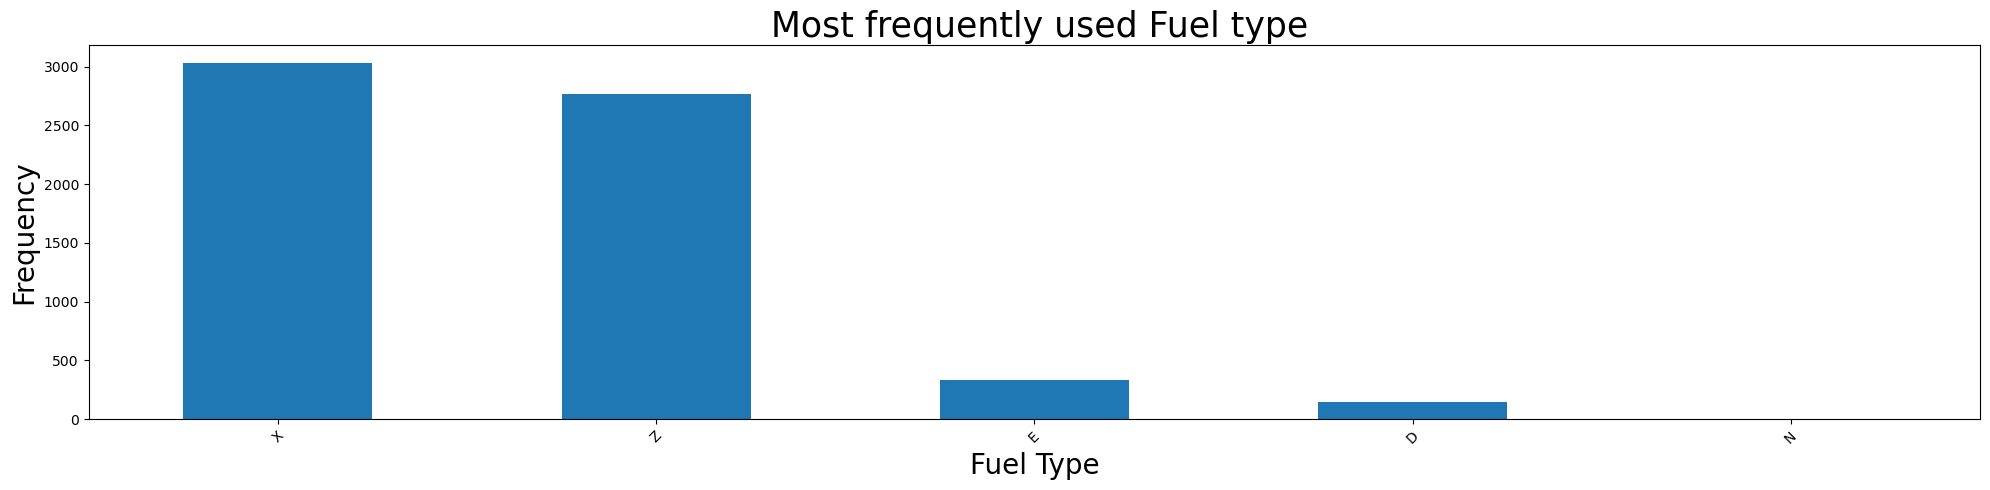

In [21]:
# Fuel Type

plt.figure(figsize=(20,5))

data.groupby('fuel_type')['fuel_type'].count().sort_values(ascending=False).plot(kind='bar')

plt.title(' Most frequently used Fuel type', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Majority of the cars  use Fuel type X and Z

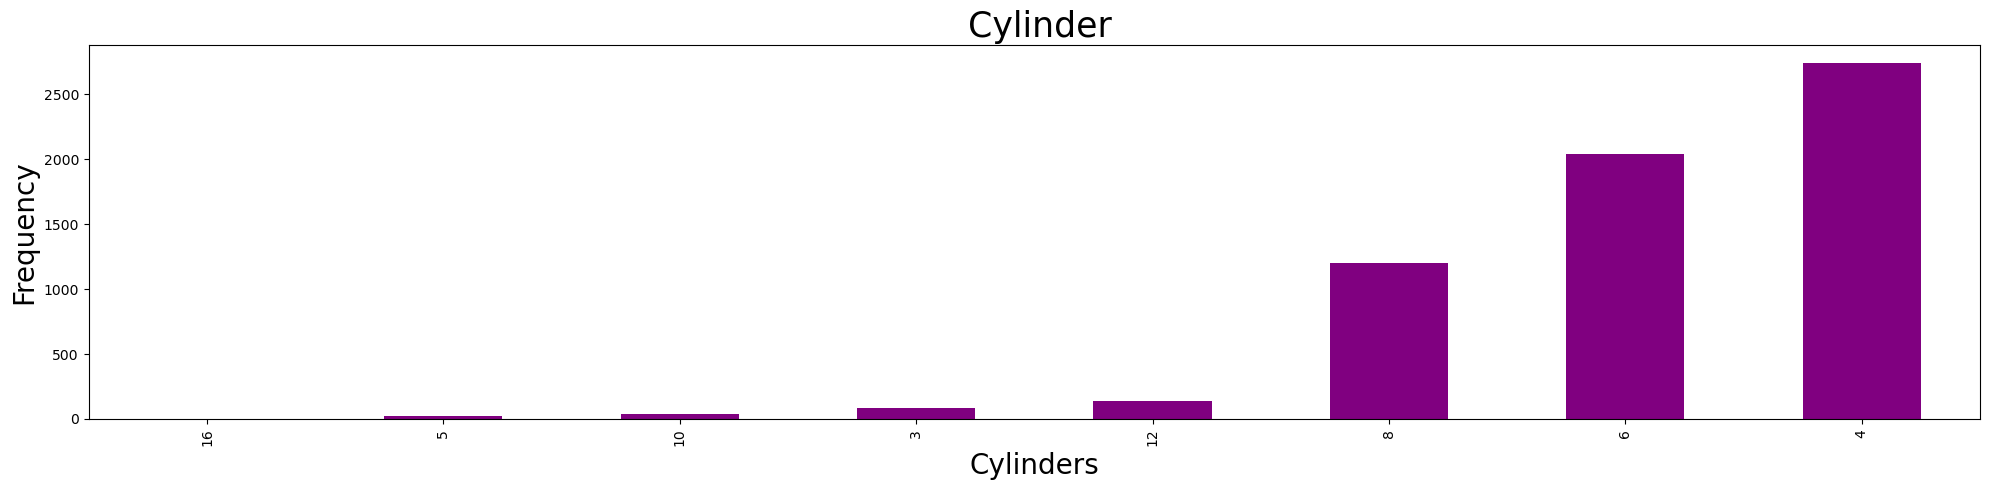

In [22]:
# Cylinders

plt.figure(figsize=(20,5))

data.groupby('cylinders')['cylinders'].count().sort_values(ascending=True).plot(kind='bar', color='purple')

plt.title(' Cylinder', fontsize=25)
plt.xlabel('Cylinders', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

most of the cars have 4 cylinders

# Analyse Target Variable

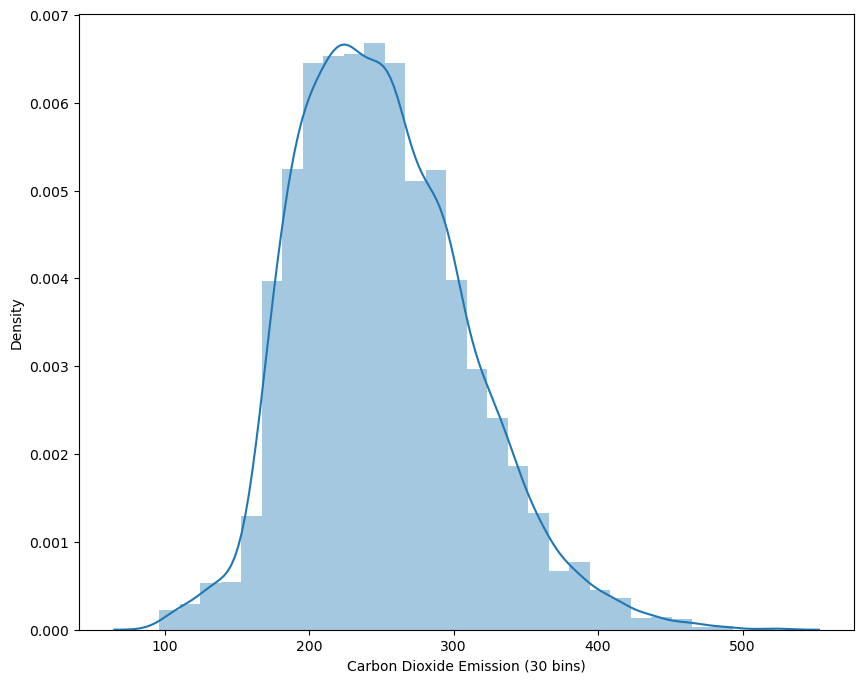

In [23]:
sns.distplot(data['co2_emissions'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')
plt.show()

From the above histogram, we can see that CO2_Emissions is moderately positive skewed

In [24]:
mean = data['co2_emissions'].mean()
mode = data['co2_emissions'].mode()
median = data['co2_emissions'].median()

print(f'Mean for CO2 Emission is {mean}')
print(f'Median for CO2 Emission is {median}')
print(f'Mode for CO2 Emission is {mode}')

Mean for CO2 Emission is 251.24725011956002
Median for CO2 Emission is 246.0
Mode for CO2 Emission is 0    221
1    246
Name: co2_emissions, dtype: int64


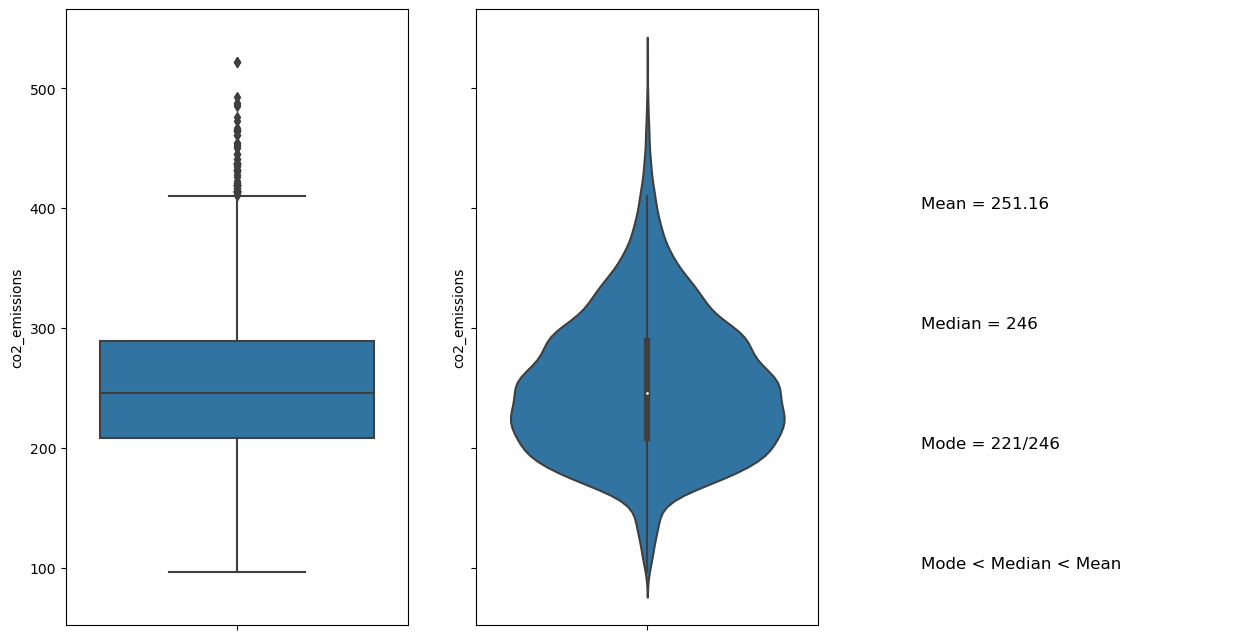

In [25]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))
sns.boxplot(y=data['co2_emissions'], orient="v", ax = axes[0])
sns.violinplot(y=data['co2_emissions'], orient="v", ax = axes[1]);
plt.text(0.1, 200, "Mode = 221/246", fontsize=12)
plt.text(0.1, 300, "Median = 246", fontsize=12)
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)
plt.axis("off")
plt.show()

Of all the three statistics, the mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.

# FEATURE DISTRIBUTION WITH RESPECT TO CO2 EMISSION

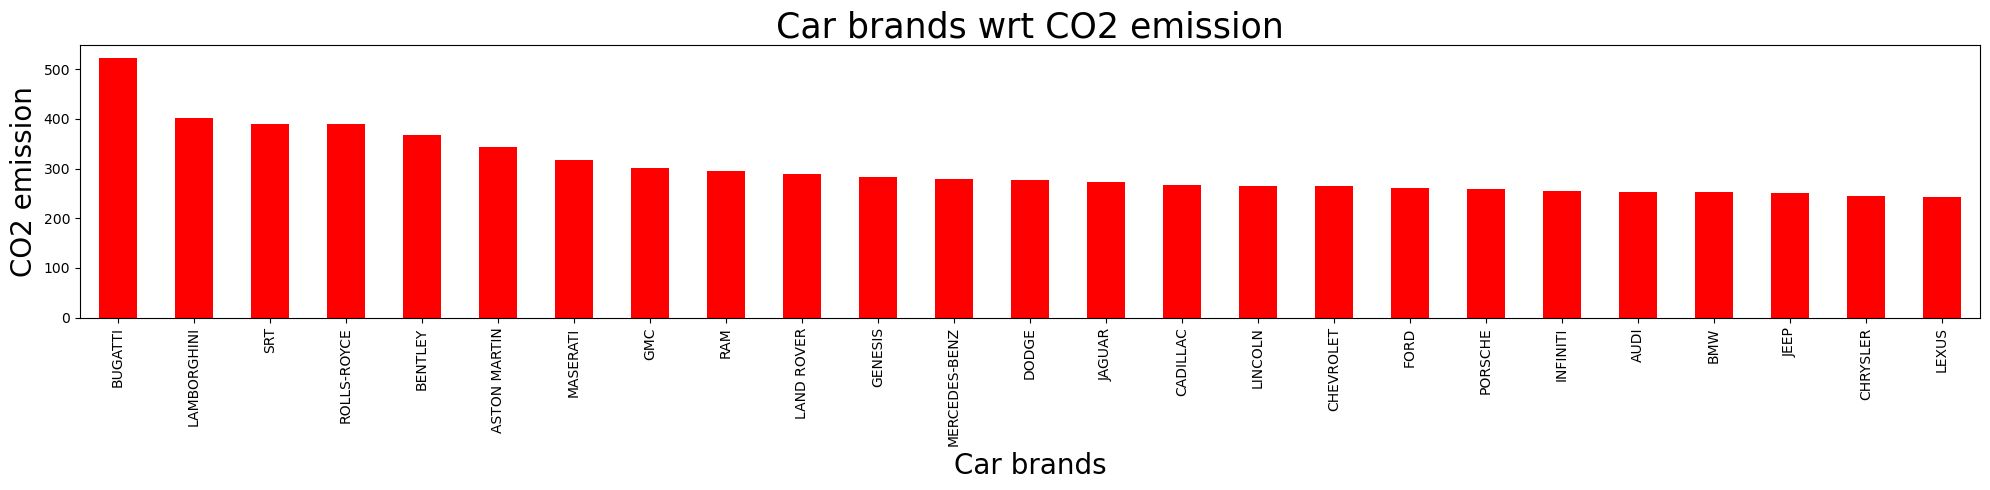

In [26]:
# Visualisation wrt CO2 emision

plt.figure(figsize=(20,5))

data.groupby('make')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')

plt.title('Car brands wrt CO2 emission', fontsize=25)
plt.xlabel('Car brands', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 CO2 Emissions v/s Make : While Ford cars are mainly found on the roads  but  its Bugatti that emit the most CO2 per car

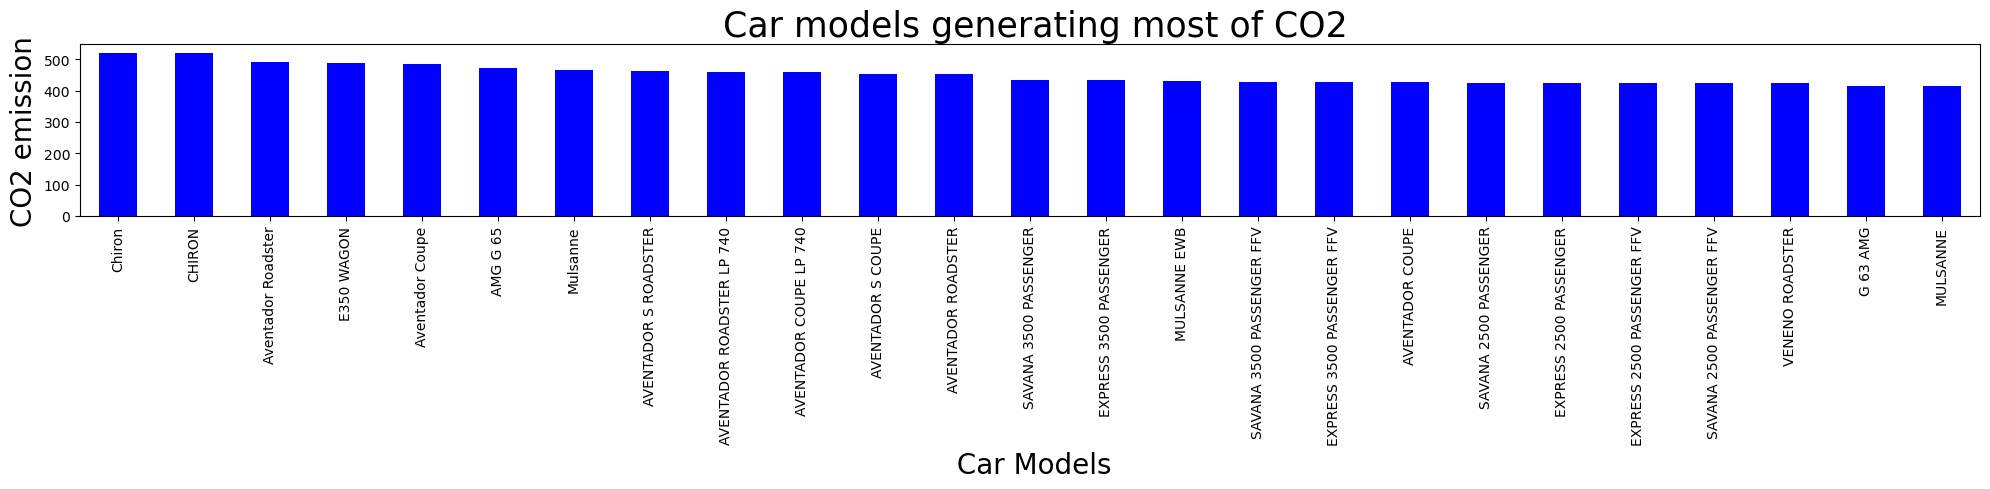

In [27]:
plt.figure(figsize=(20,5))

data.groupby('model')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='blue')

plt.title(' Car models generating most of CO2', fontsize=25)
plt.xlabel(' Car Models', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model

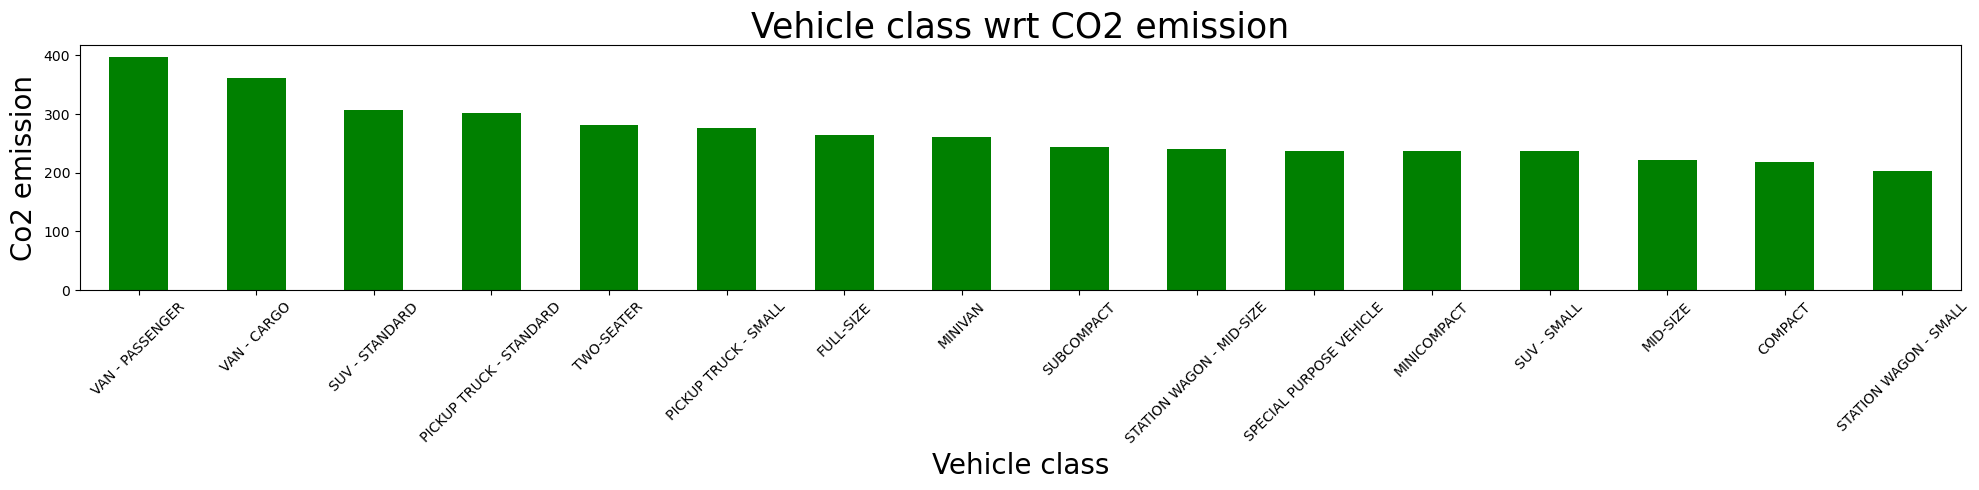

In [28]:
plt.figure(figsize=(20,5))

data.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='green')

plt.title('Vehicle class wrt CO2 emission', fontsize=25)
plt.xlabel('Vehicle class' , fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2

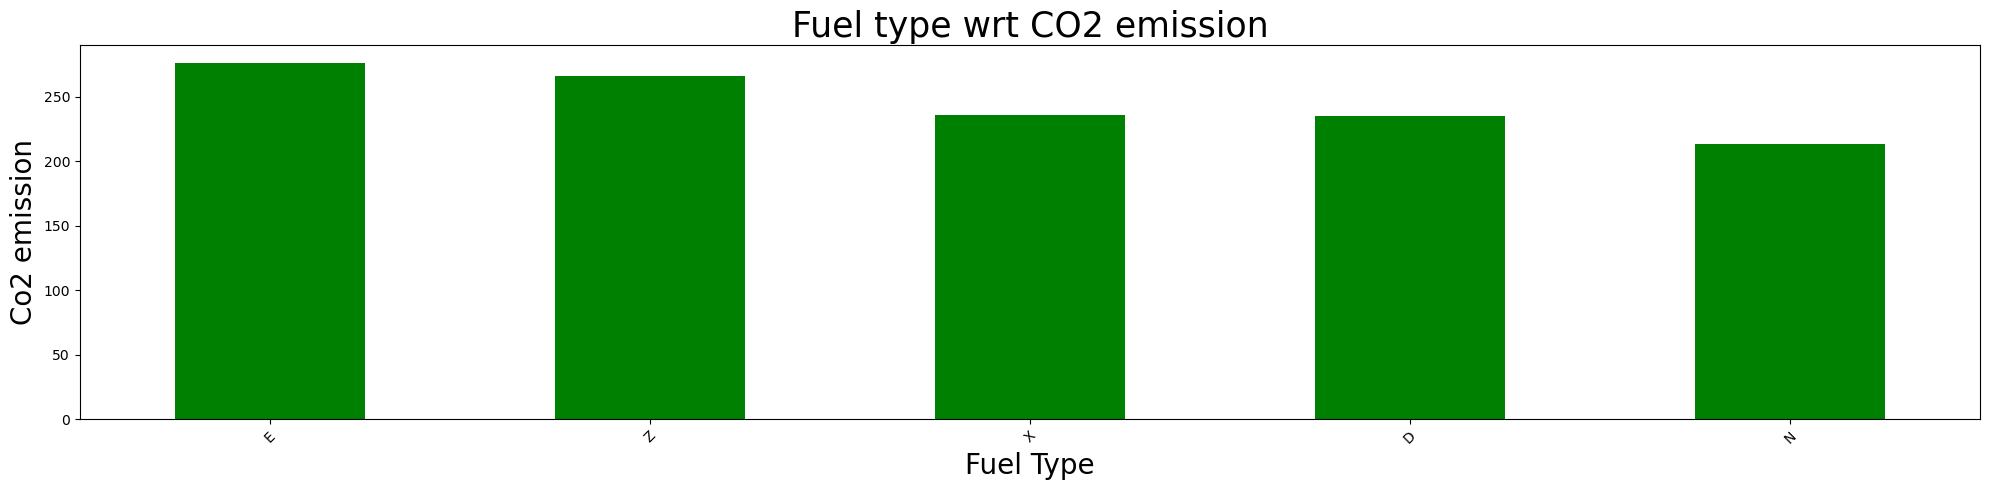

In [29]:
plt.figure(figsize=(20,5))

data.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CO2 Emissions v/s Fuel_Type: Cars using Fuel Type E and z are emitting the most CO2

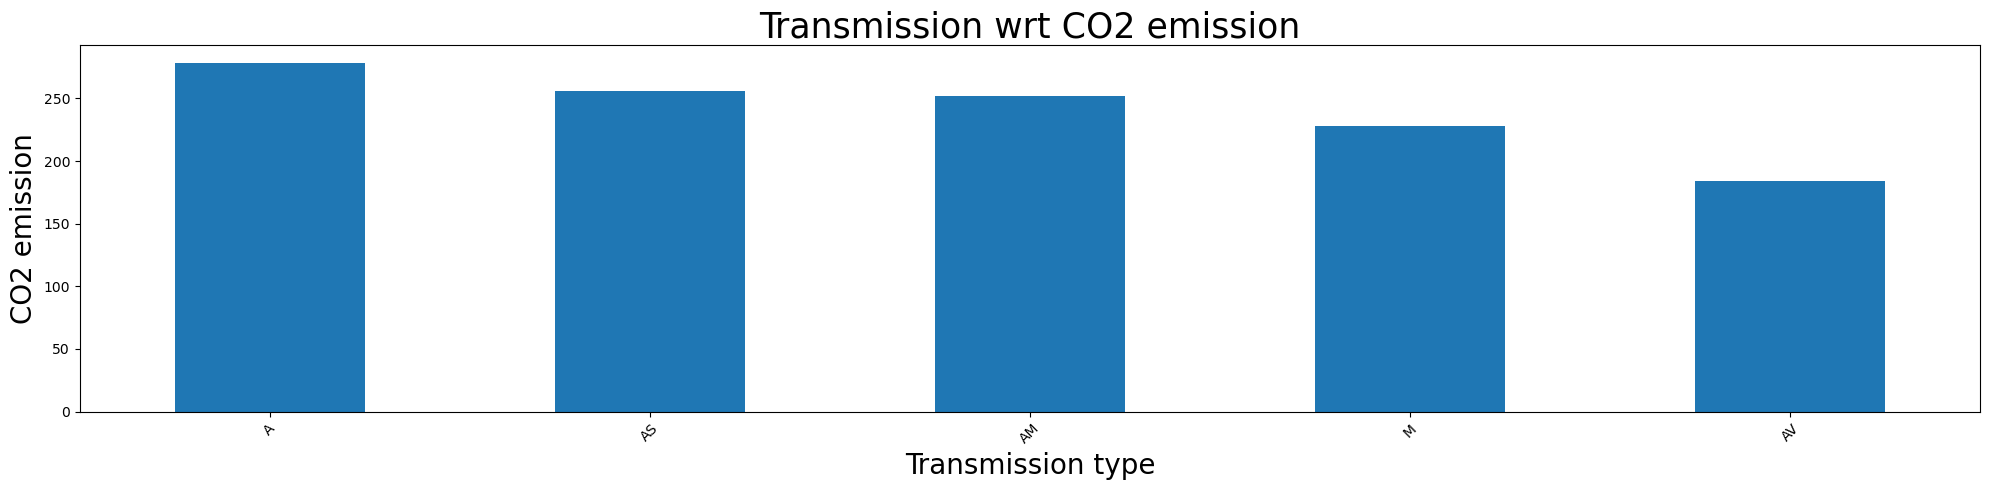

In [30]:
plt.figure(figsize=(20,5))

data.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Transmission wrt CO2 emission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit more CO2

<Figure size 1000x800 with 0 Axes>

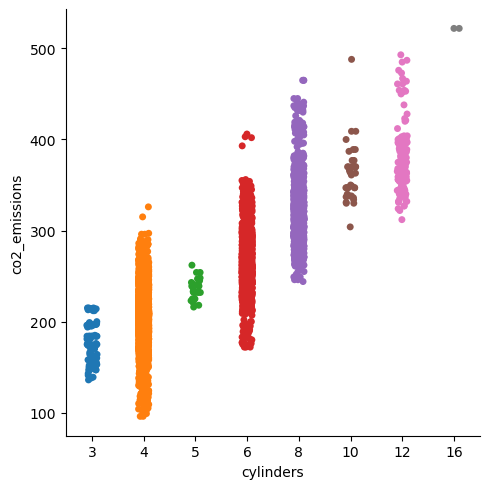

In [31]:
plt.figure(figsize=(10,8))

sns.catplot(x='cylinders', y='co2_emissions',data = data)

plt.show()

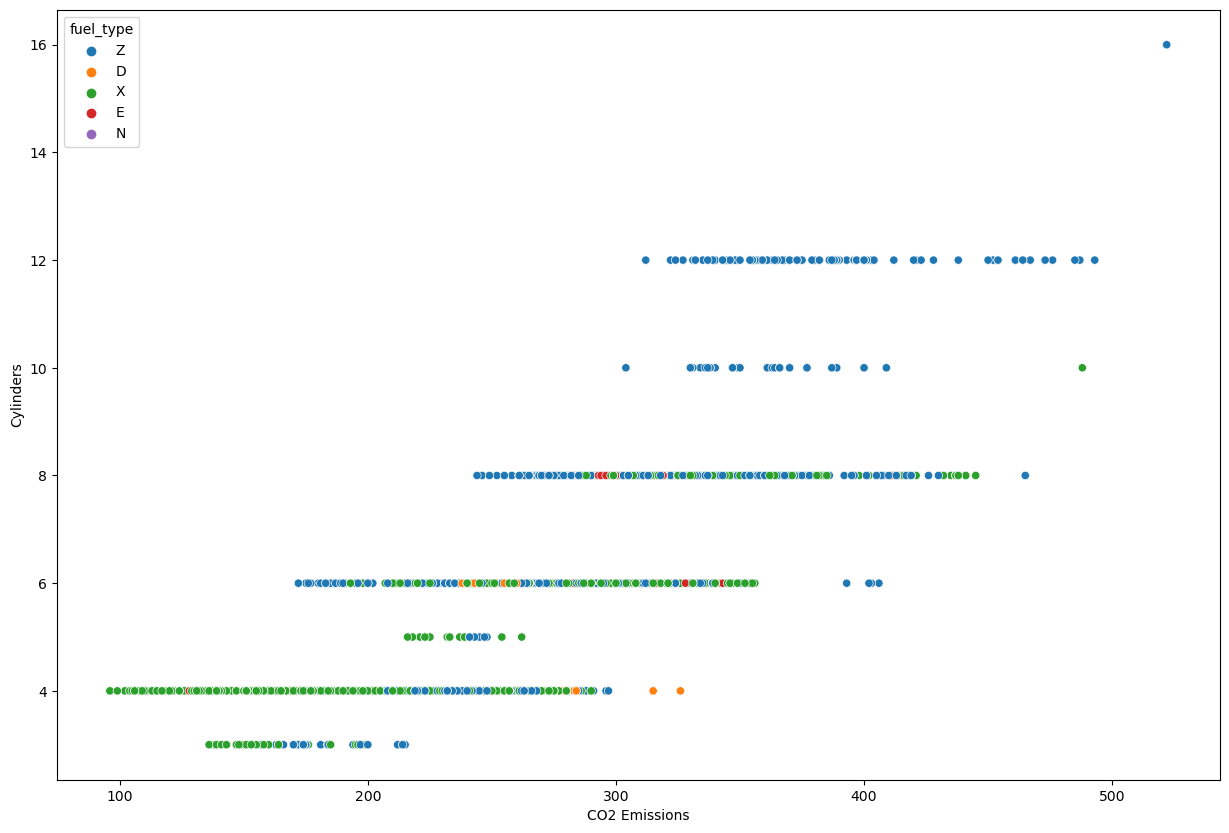

In [32]:
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot('co2_emissions','cylinders',data = data,hue='fuel_type')
plt.xlabel("CO2 Emissions", fontsize=10)
plt.ylabel("Cylinders", fontsize=10)
plt.show()

From the above scatter plot we can see that:

As the number of cylinders increase, the CO2 emissions increase Cars with 8 and less than 8 cylinders prefer using Fuel Type X which result in less emissions of CO2 Fuel Type Z results in more CO2 emissions than the others

# AUTOMATED EDA

# D-Tale

In [33]:
!pip install dtale
import dtale
dtale.show(data)

# Sweetviz and Pandas profiling

In [34]:
!pip install sweetviz
!pip install pandas_profiling
!pip install markupsafe

In [35]:
import sweetviz as sv
sweet_report=sv.analyze(data)
sweet_report.show_html('stock_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report stock_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
import pandas_profiling as pan_prof
stock_report=pan_prof.ProfileReport(data)
stock_report.to_file(output_file='report.html')
stock_report

2023-07-23 20:40:40,764 - INFO     - Pandas backend loaded 1.4.4
2023-07-23 20:40:40,776 - INFO     - Numpy backend loaded 1.21.5
2023-07-23 20:40:40,778 - INFO     - Pyspark backend NOT loaded
2023-07-23 20:40:40,780 - INFO     - Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Discovery of Outliers

In [37]:
df_num_features=data.select_dtypes(include=np.number)

In [38]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

engine_size                        1.7
cylinders                          2.0
fuel_consumption_city              4.6
fuel_consumption_hwy               2.8
fuel_consumption_comb(l/100km)     3.8
fuel_consumption_comb(mpg)        10.0
co2_emissions                     81.0
dtype: float64


In [39]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column engine_size are 121
Total number of Outliers in column cylinders are 177
Total number of Outliers in column fuel_consumption_city are 116
Total number of Outliers in column fuel_consumption_hwy are 150
Total number of Outliers in column fuel_consumption_comb(l/100km) are 115
Total number of Outliers in column fuel_consumption_comb(mpg) are 93
Total number of Outliers in column co2_emissions are 74


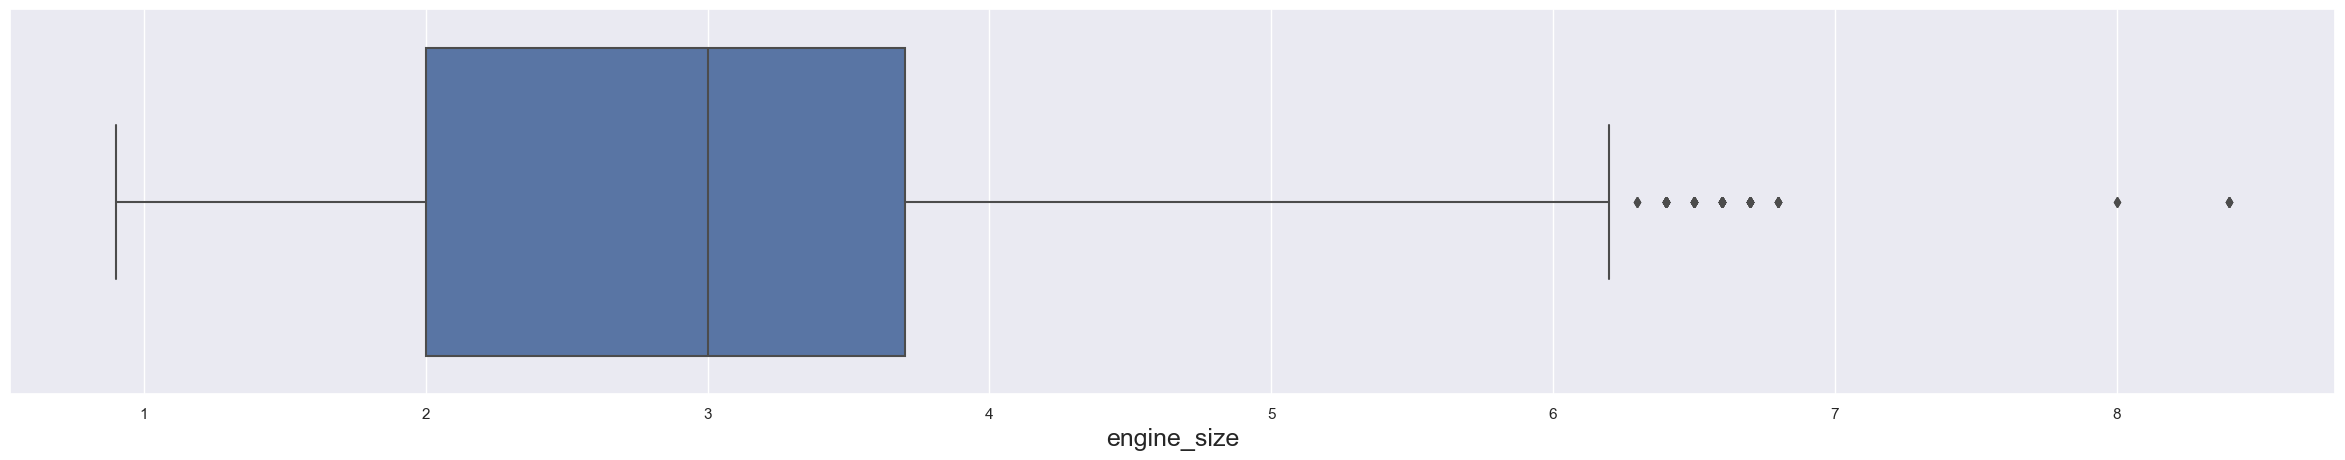

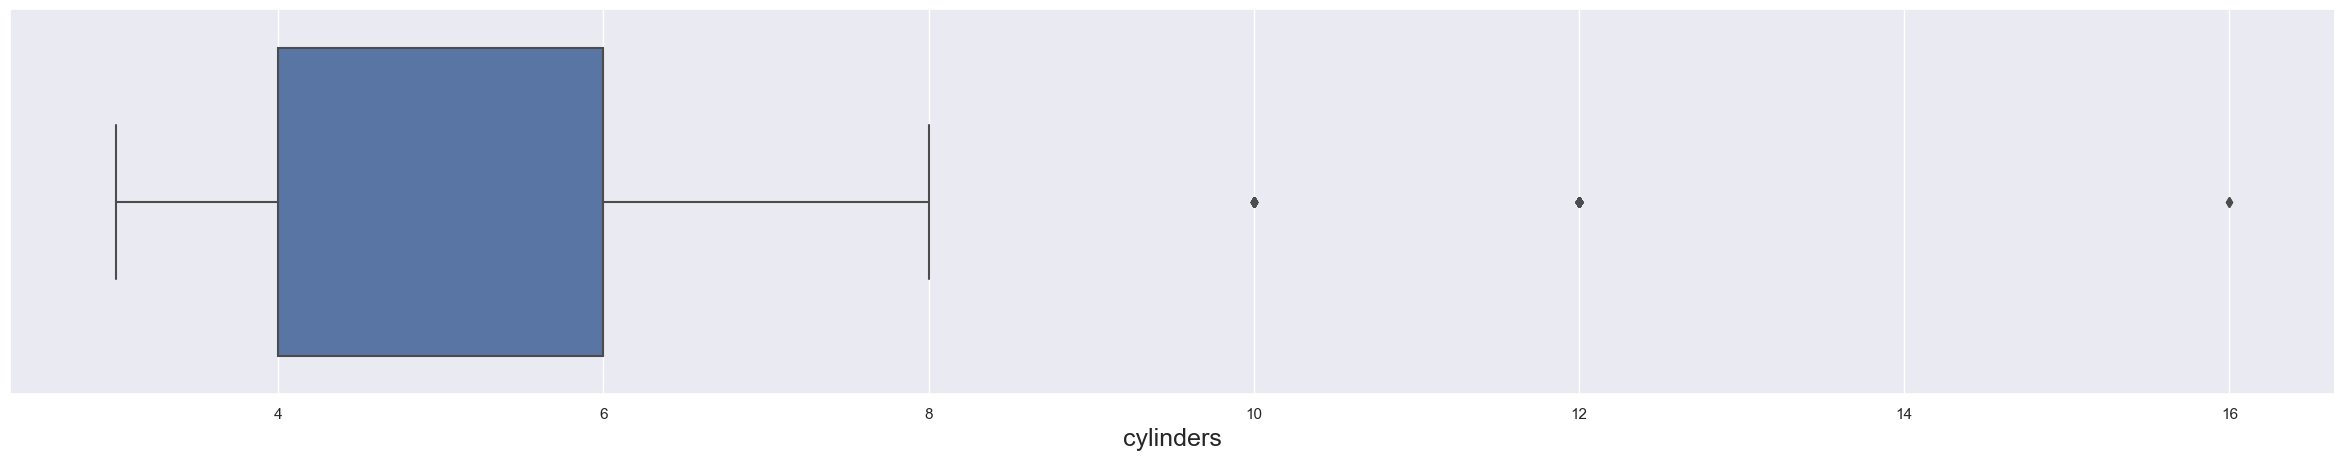

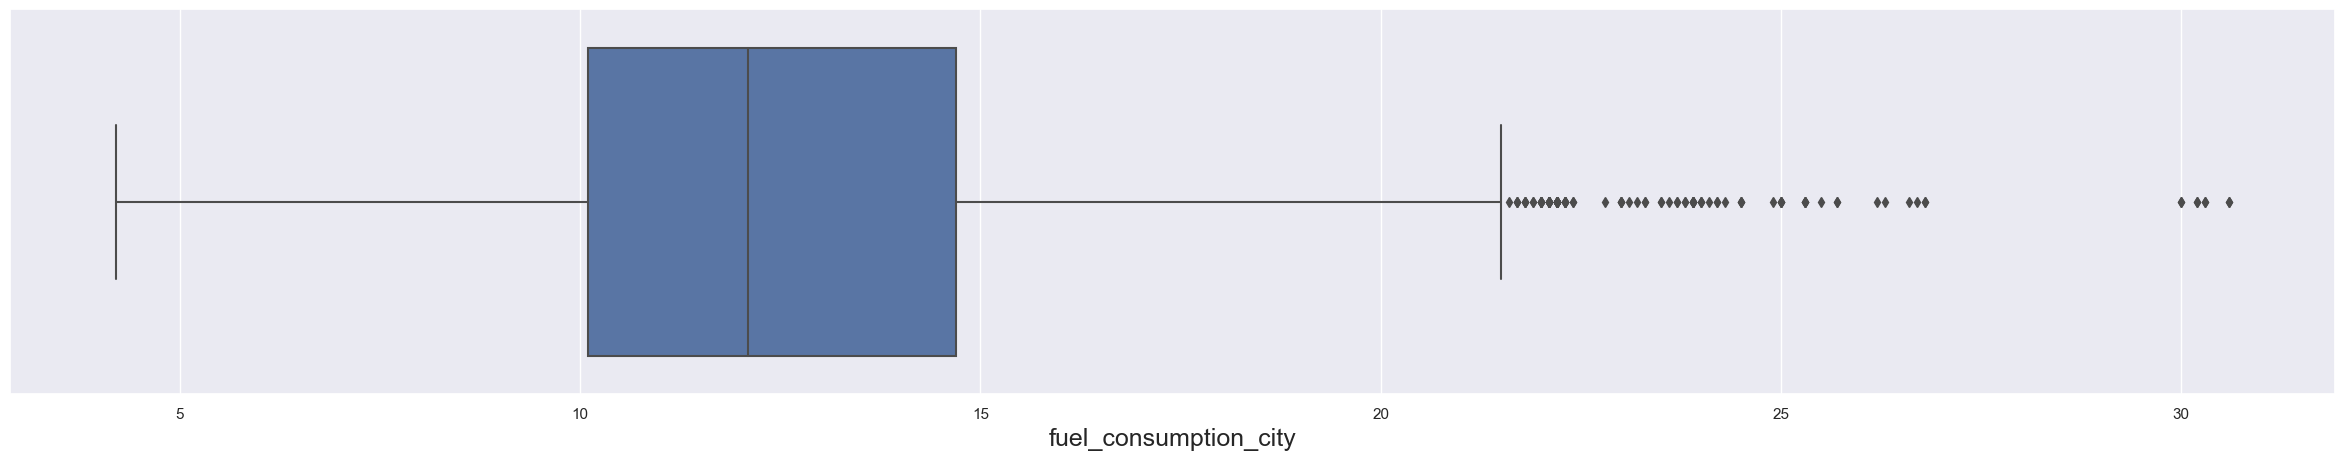

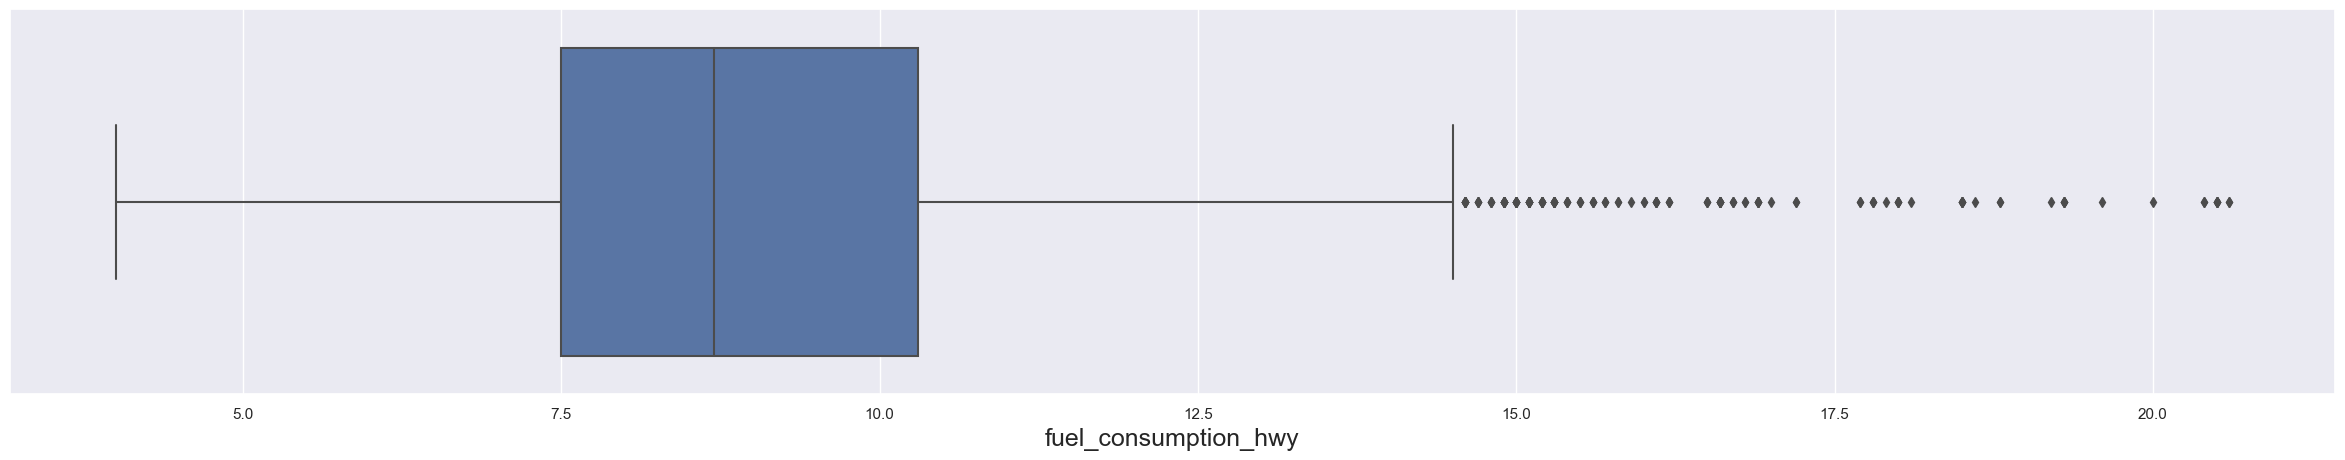

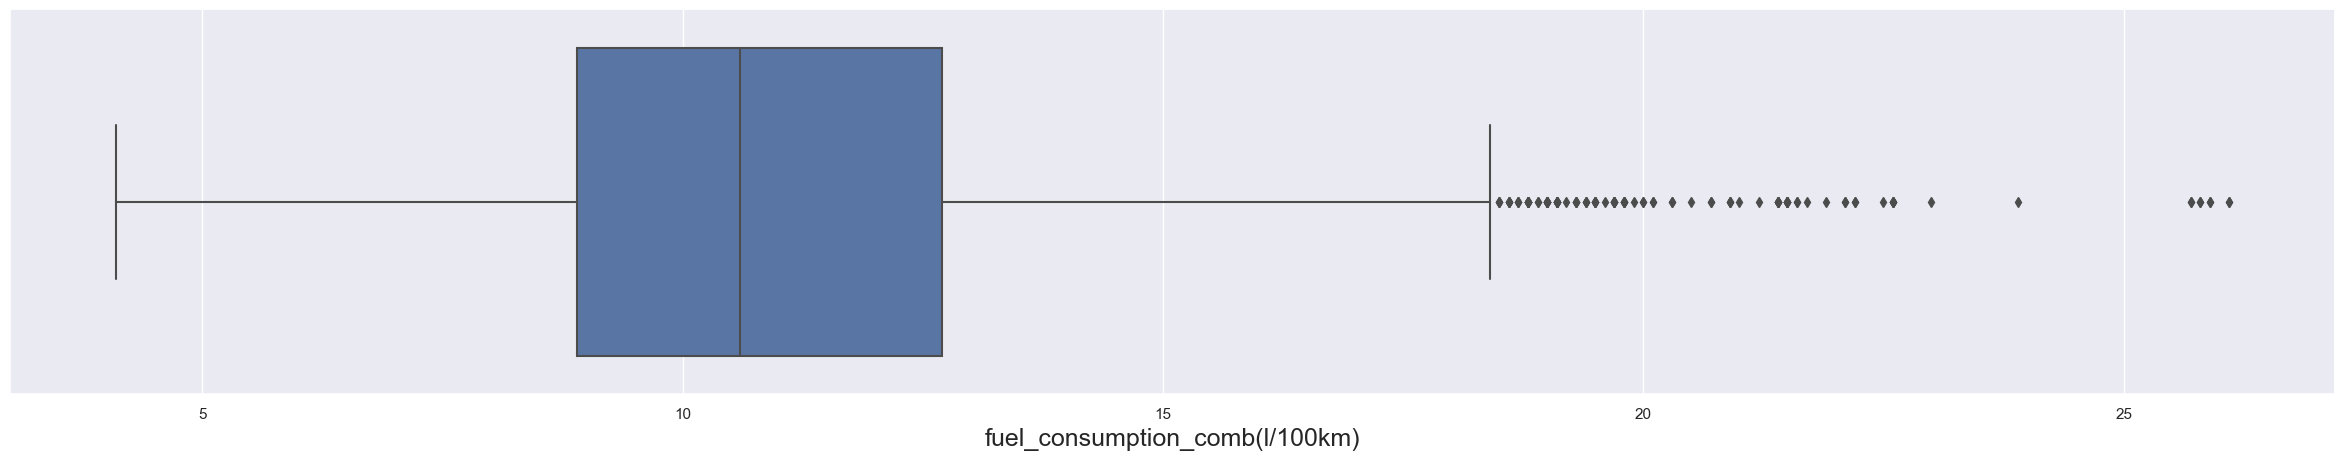

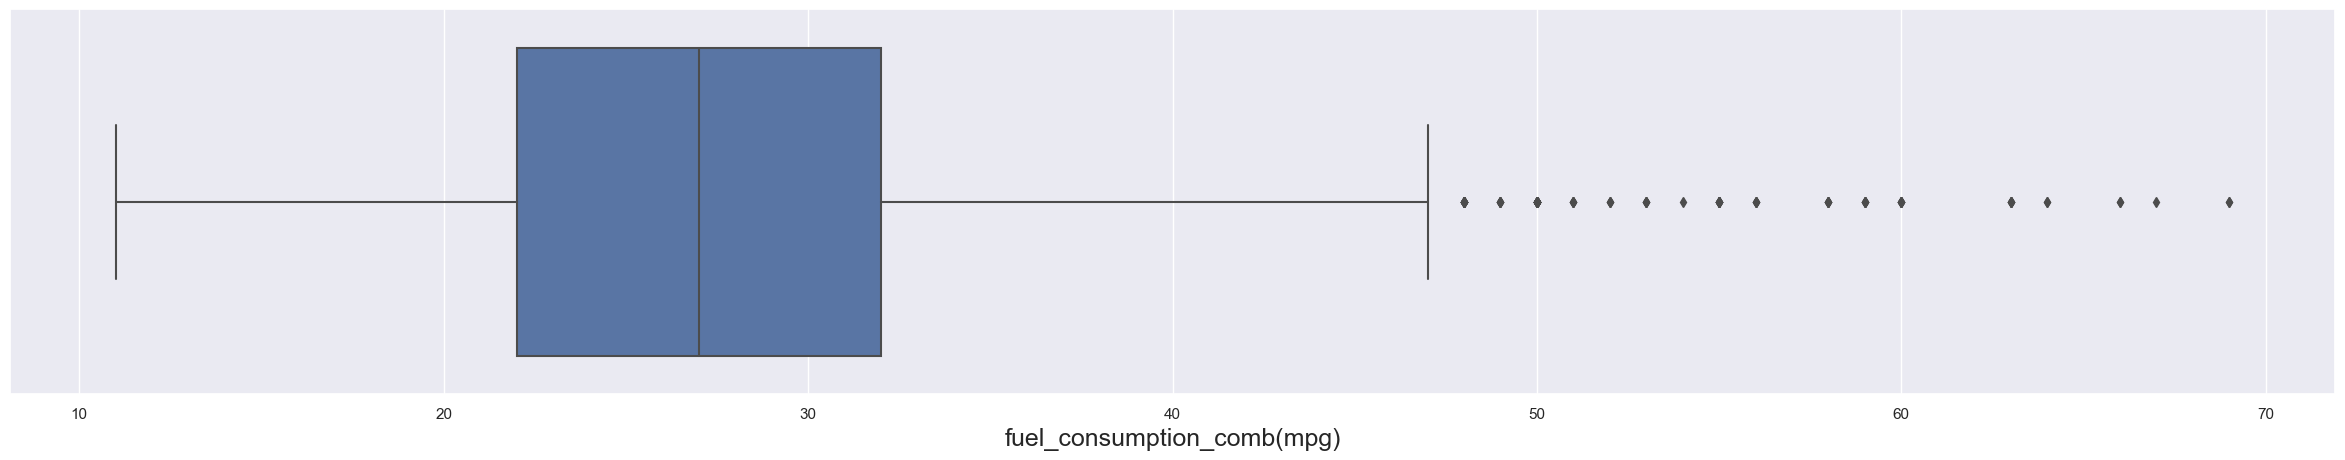

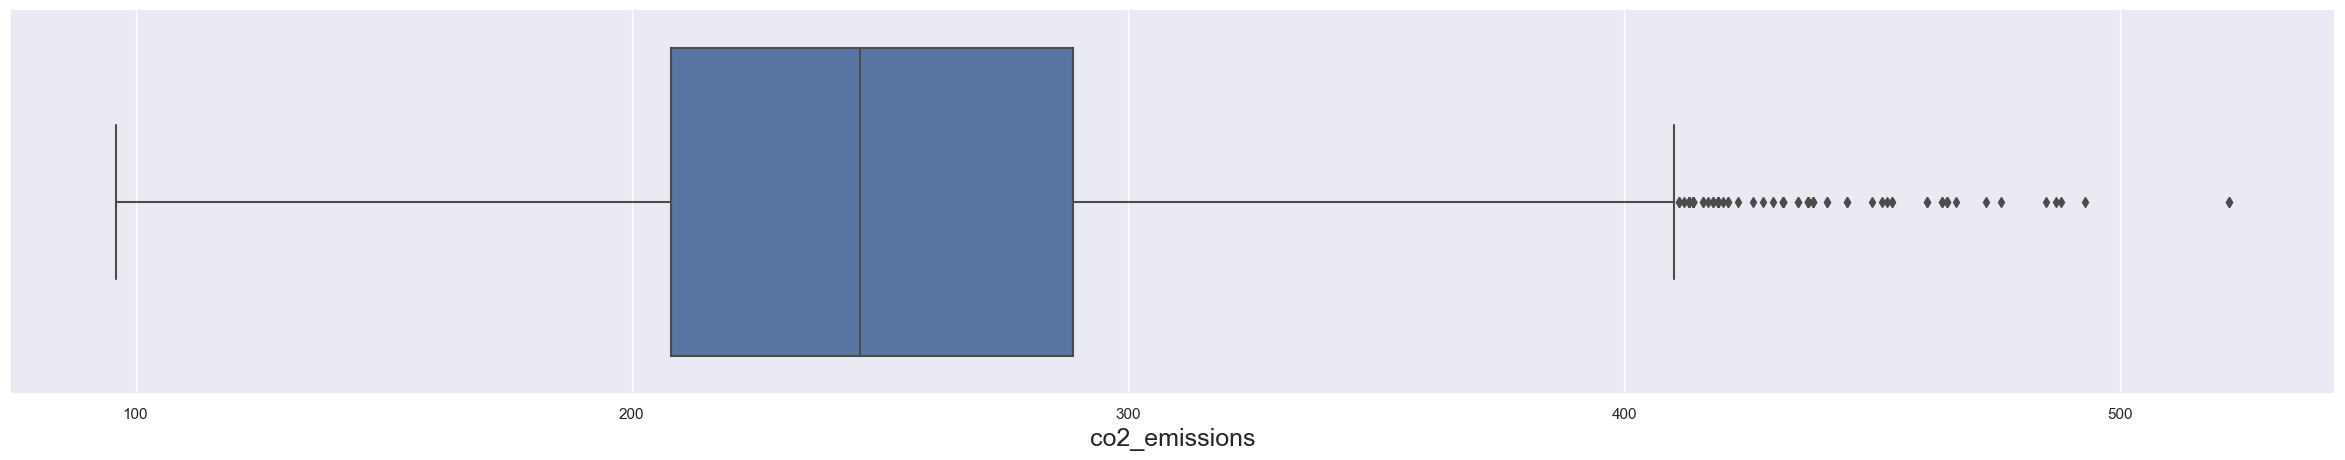

In [40]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [41]:
# # to know the position or indexes of outliers
outlier_indices = {}

for i in outlier.columns:
    outliers = outlier[outlier[i] == True].index.tolist()
    outlier_indices[i] = outliers

for key, value in outlier_indices.items():
    print(f"Outliers in column {key} are at index positions: {value}")


Outliers in column engine_size are at index positions: [36, 75, 290, 300, 301, 313, 349, 589, 637, 927, 928, 929, 930, 931, 932, 933, 945, 946, 1103, 1140, 1346, 1348, 1349, 1358, 1364, 1615, 1616, 1618, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 2038, 2061, 2298, 2300, 2301, 2302, 2313, 2318, 2337, 2604, 2661, 2662, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 3152, 3153, 3213, 3359, 3361, 3363, 3364, 3370, 3375, 3383, 3646, 3702, 3703, 3704, 3705, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 4137, 4195, 4290, 4489, 4511, 4512, 4513, 4514, 4709, 4710, 4711, 4712, 4713, 4714, 4828, 4876, 4891, 5006, 5008, 5021, 5029, 5285, 5321, 5322, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5825, 5929, 5931, 5932, 5935, 5936, 6112, 6203, 6204, 6205, 6206, 6207, 6208]
Outliers in column cylinders are at index positions: [13, 14, 19, 36, 47, 48, 51, 52, 70, 72, 73, 74, 112, 349, 637, 638, 639, 927, 928, 929, 930, 931, 932, 933, 945, 946, 1079, 1082, 1085, 1103, 1111, 1112, 1115, 1116, 1135, 1137, 1193, 

In [42]:
# replacing the outliers with mean in each column
for column in outlier_indices.keys():
    mean_value = df_num_features[column].mean()
    df_num_features.loc[outlier_indices[column], column] = mean_value


In [43]:
# checking the no of outliers
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column engine_size are 0
Total number of Outliers in column cylinders are 0
Total number of Outliers in column fuel_consumption_city are 0
Total number of Outliers in column fuel_consumption_hwy are 0
Total number of Outliers in column fuel_consumption_comb(l/100km) are 0
Total number of Outliers in column fuel_consumption_comb(mpg) are 0
Total number of Outliers in column co2_emissions are 0


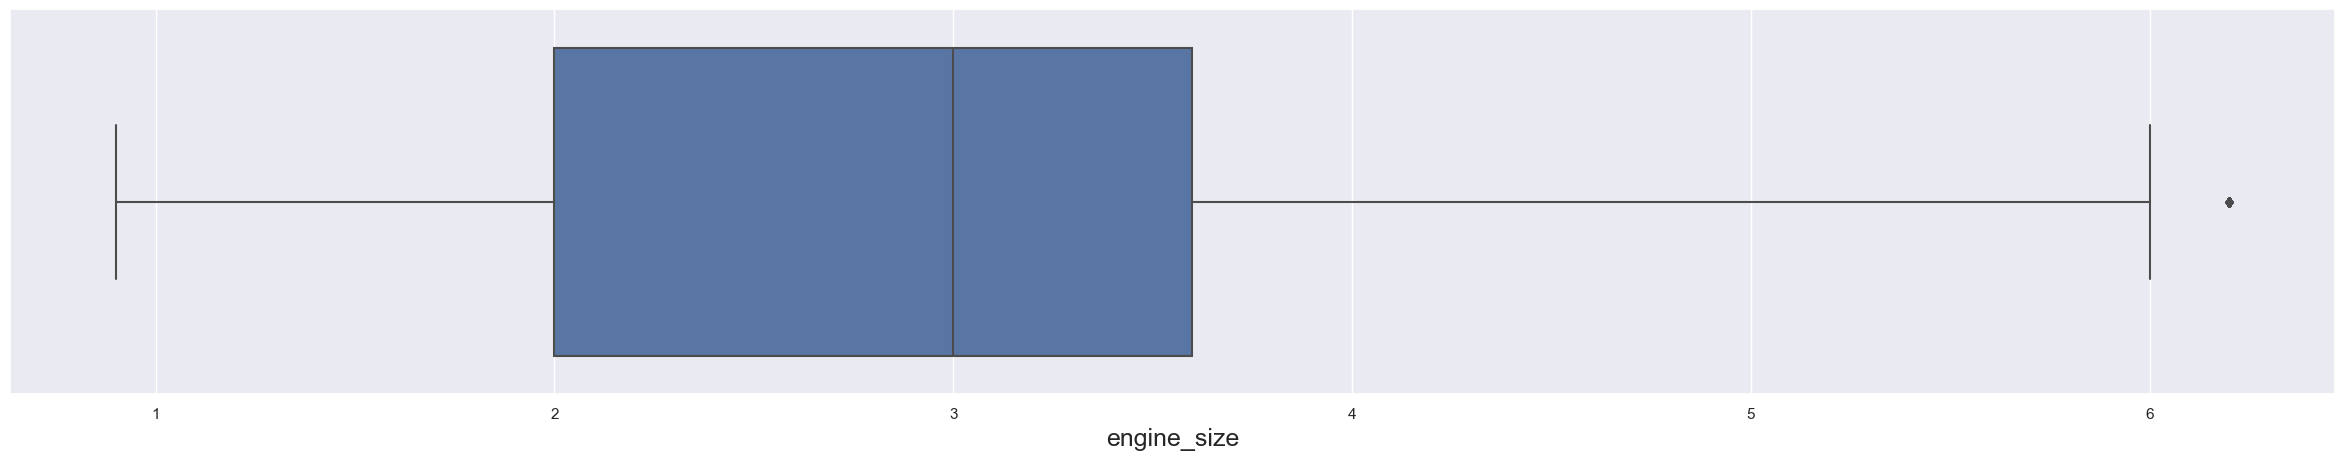

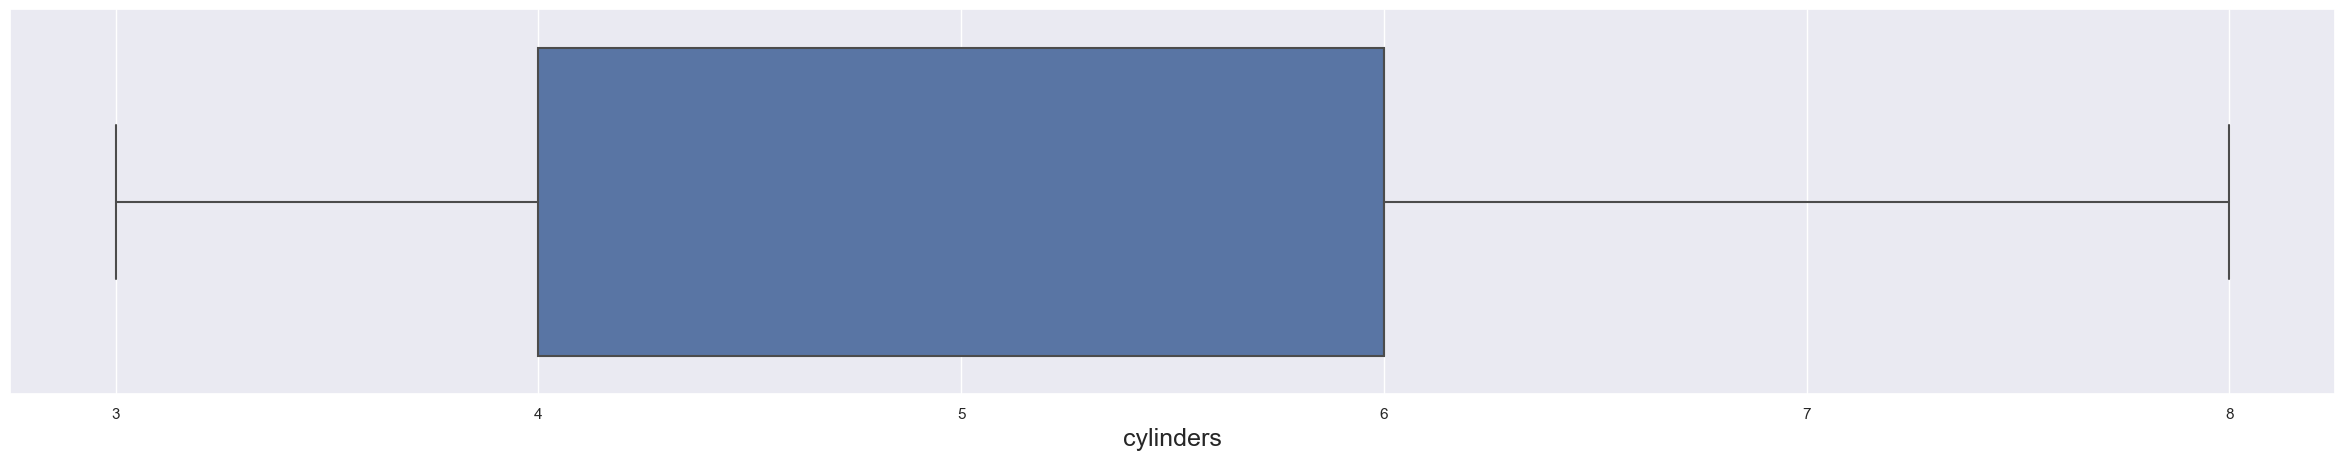

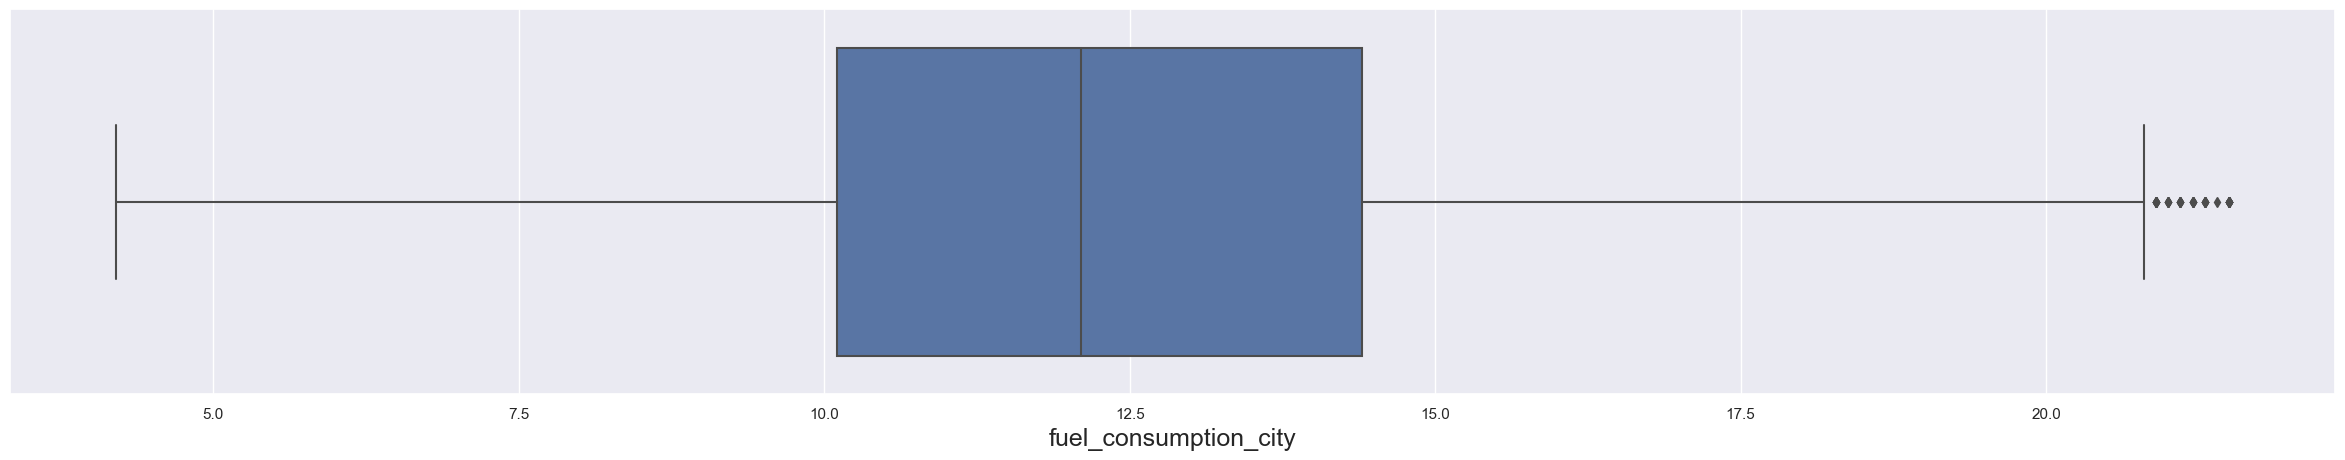

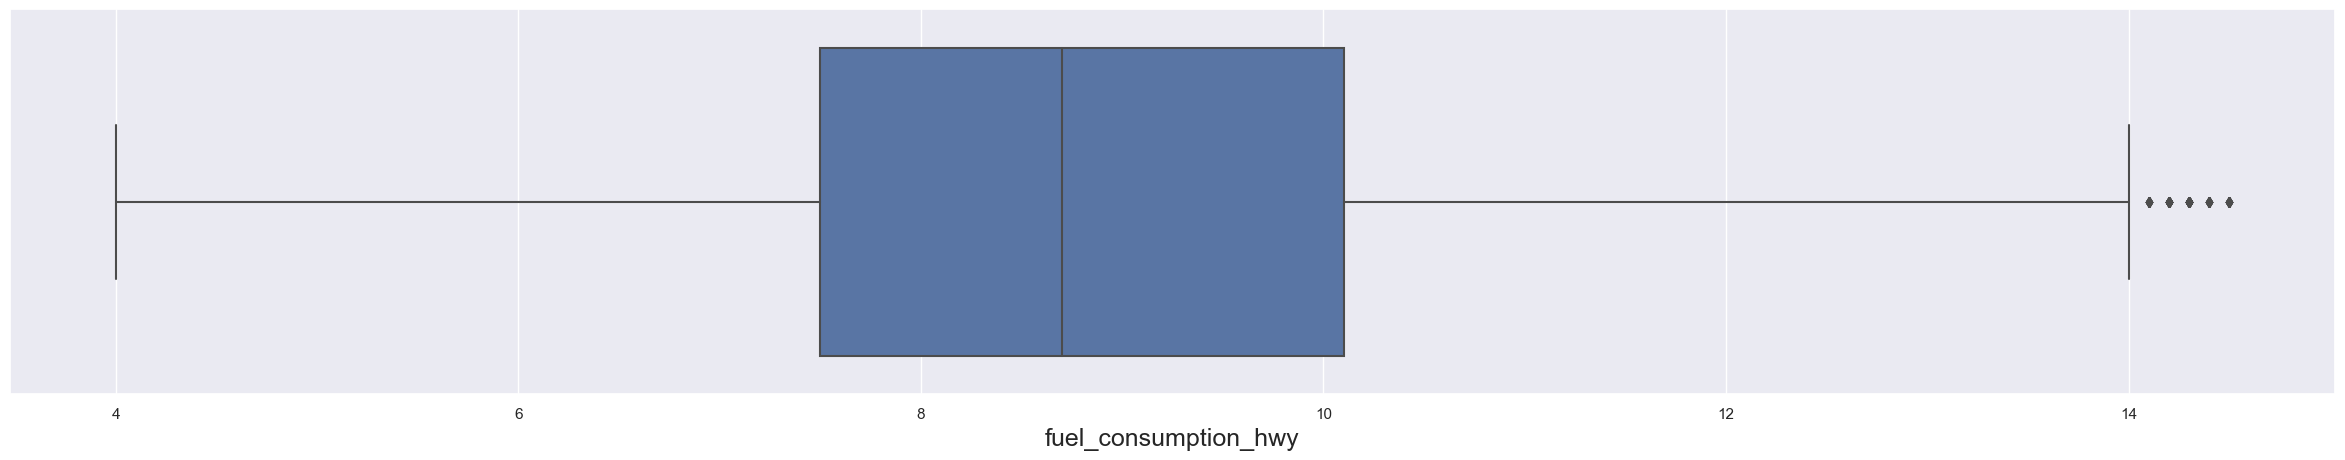

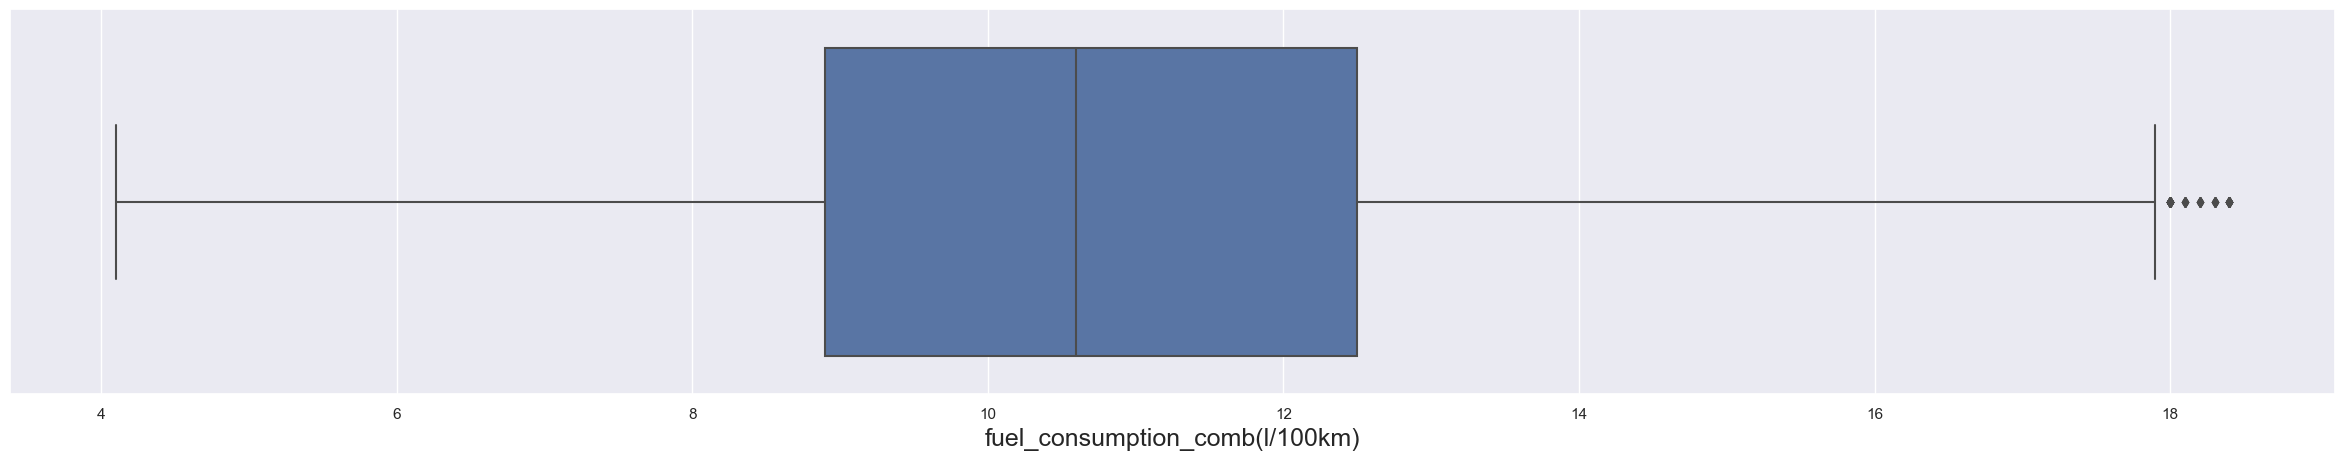

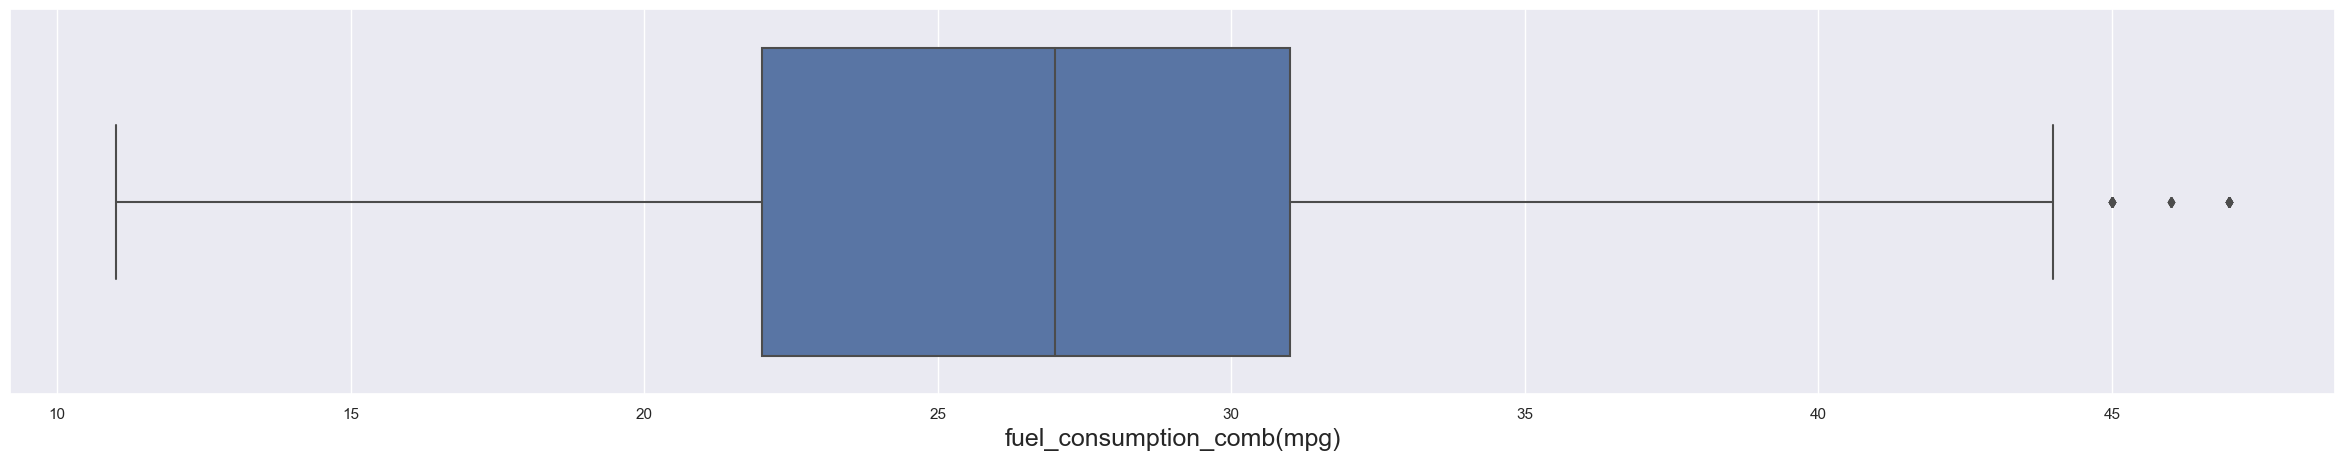

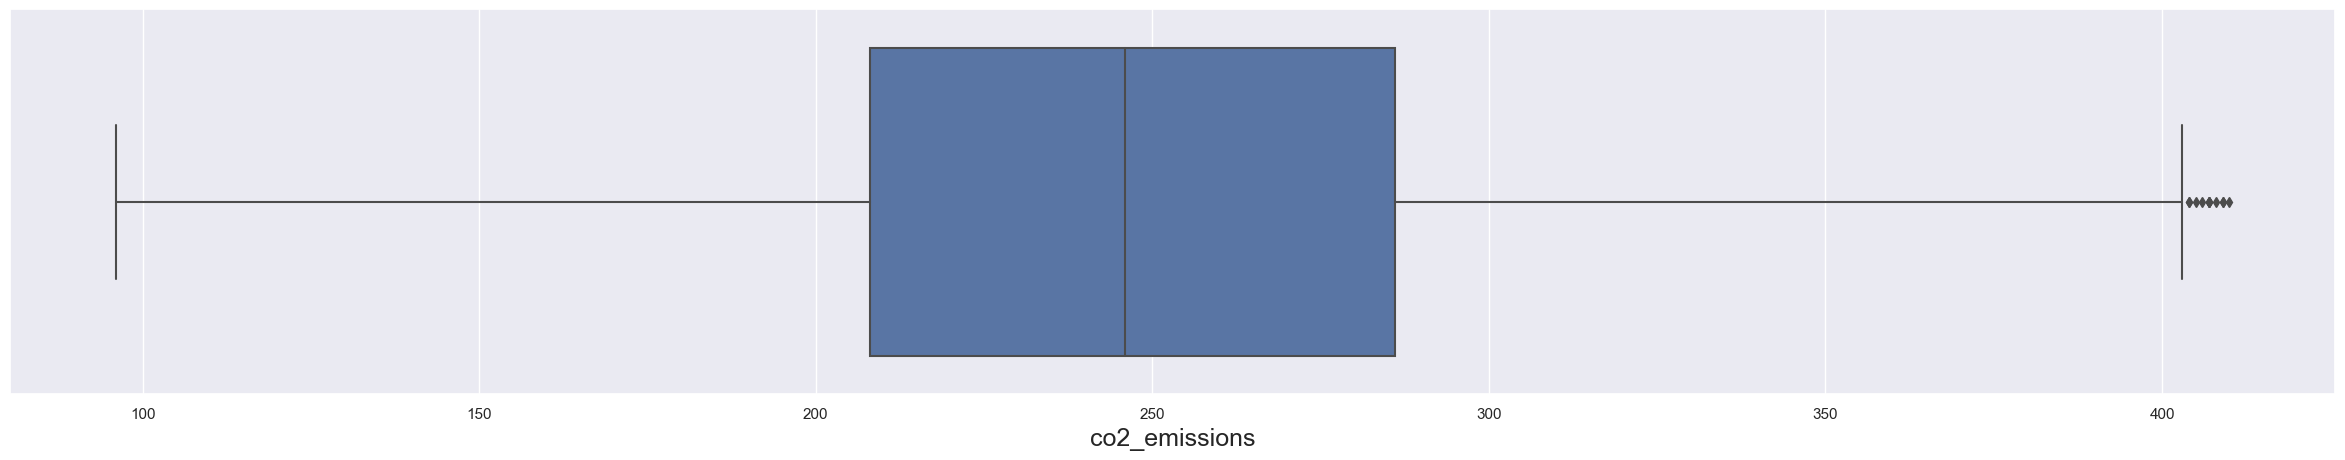

In [44]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

Text(0.5, 1.0, 'Correlation')

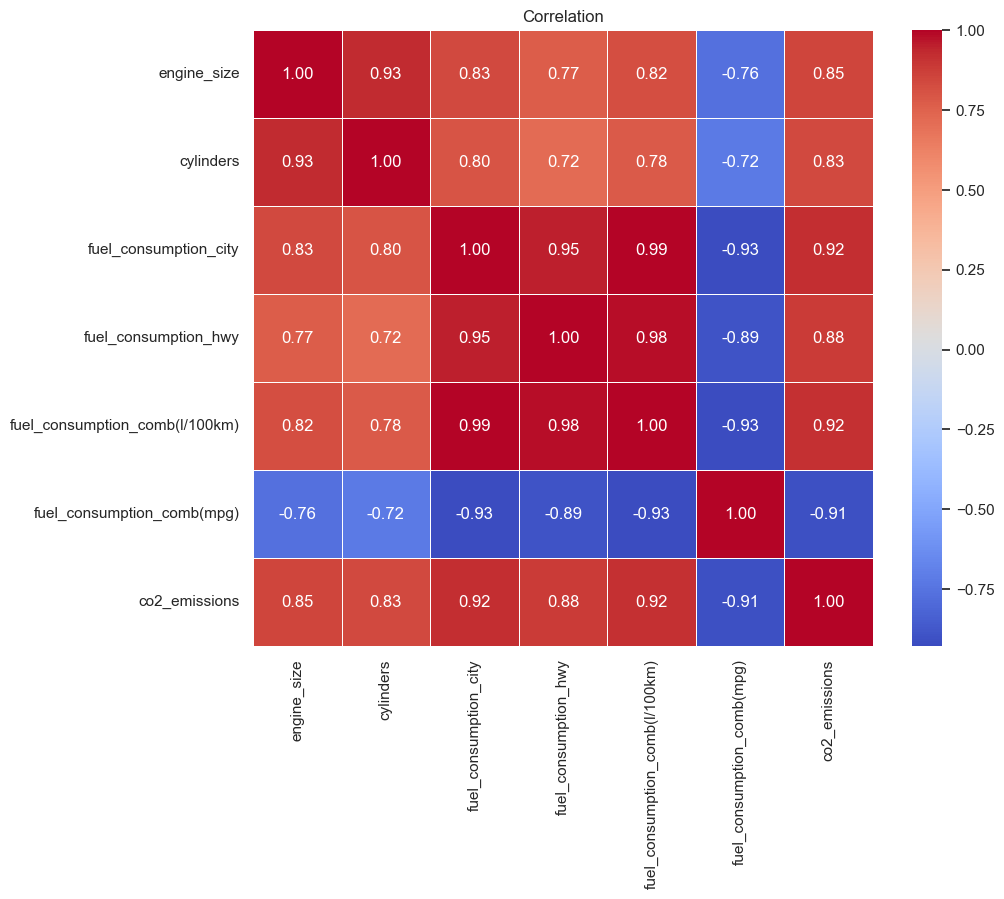

In [45]:
corr = data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

In [46]:
data.shape

(6273, 12)

In [47]:
#Duplicate Data
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


In [48]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)

In [49]:
data.shape

(6273, 12)



```
`# This is formatted as code`
```

# DATA PREPROCESSING

In [50]:
data.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

In [51]:
data['transmission'].value_counts()

AS    2720
A     1536
M     1019
AM     540
AV     458
Name: transmission, dtype: int64

In [52]:
data['fuel_type'].value_counts()

X    3030
Z    2765
E     330
D     147
N       1
Name: fuel_type, dtype: int64

In [53]:
# creating dummy variables of fuel type and transmission (catagorical features)

data_ft =pd.get_dummies(data['fuel_type'], prefix='Fuel')
data_trans = pd.get_dummies(data["transmission"])

In [54]:
data_ft.head()

Fuel_D  Fuel_E  Fuel_N  Fuel_X  Fuel_Z
0       0       0       0       0       1
1       0       0       0       0       1
2       0       0       0       0       1
3       0       0       0       0       1
4       0       0       0       0       1

In [55]:
data_trans.head()

A  AM  AS  AV  M
0  0   0   1   0  0
1  0   0   0   0  1
2  0   0   0   1  0
3  0   0   1   0  0
4  0   0   1   0  0

In [56]:
df = [data, data_ft,data_trans]

data = pd.concat(df, axis=1)
data.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  ...  Fuel_D  Fuel_E  Fuel_N  Fuel_X  \
0                             8.5  ...       0       0       0       0   
1                             9.6  ...       0       0       0       0   
2                             5.9  ...       0       0       0       0   
3                            11.1  ...       0       0       0       0   
4                            10.6  ...       0       0       0       0   

   Fuel_Z  A  AM  AS  AV  M  
0       1  0   0   1   0  0  
1       1  0   0   0   0  1  
2       1  0   0   0   1  0  
3       1  0   0   1   0  0  
4       1  0   0   1   0  0  

[5 rows x 22 columns]

In [57]:
data.drop(['fuel_type', 'transmission'], inplace=True, axis=1)


In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['make'] = label_encoder.fit_transform(data['make'])
data['model'] = label_encoder.fit_transform(data['model'])
data['vehicle_class'] = label_encoder.fit_transform(data['vehicle_class'])

In [59]:
data.head()

make  model  vehicle_class  engine_size  cylinders  fuel_consumption_city  \
0     0   1057              0          2.0          4                    9.9   
1     0   1057              0          2.4          4                   11.2   
2     0   1058              0          1.5          4                    6.0   
3     0   1233             11          3.5          6                   12.7   
4     0   1499             11          3.5          6                   12.1   

   fuel_consumption_hwy  fuel_consumption_comb(l/100km)  \
0                   6.7                             8.5   
1                   7.7                             9.6   
2                   5.8                             5.9   
3                   9.1                            11.1   
4                   8.7                            10.6   

   fuel_consumption_comb(mpg)  co2_emissions  Fuel_D  Fuel_E  Fuel_N  Fuel_X  \
0                          33            196       0       0       0       0   
1                          29            221       0       0       0       0   
2                          48            136       0       0       0       0   
3                          25            255       0       0       0       0   
4                          27            244       0       0       0       0   

   Fuel_Z  A  AM  AS  AV  M  
0       1  0   0   1   0  0  
1       1  0   0   0   0  1  
2       1  0   0   0   1  0  
3       1  0   0   1   0  0  
4       1  0   0   1   0  0

Text(0.5, 1.0, 'Correlation')

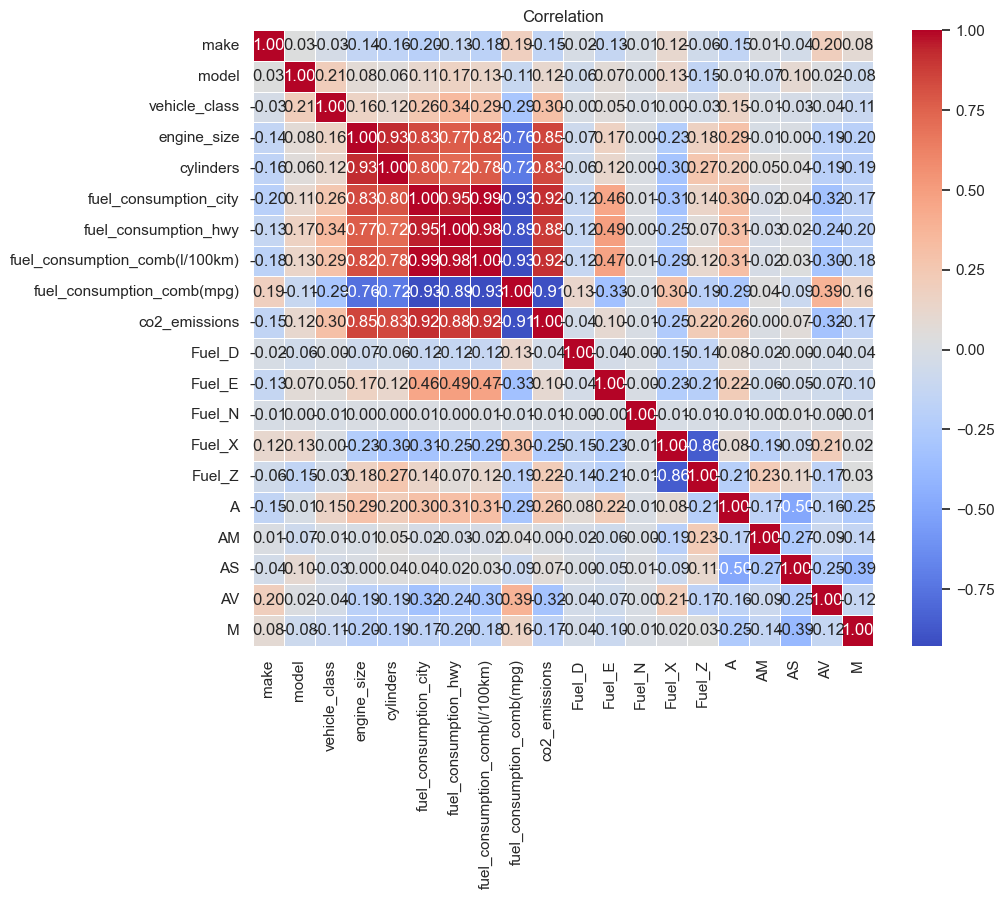

In [60]:
corr = data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

In [61]:
# Split the dataset into X and y
X = data.drop(['co2_emissions'], axis=1)
y = data['co2_emissions']

# FEATURE SELECTION USING CHI-SQUARE TEST

---



---



---



In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [63]:
ranked_feature = SelectKBest(score_func = chi2, k='all')
ordered_feature = ranked_feature.fit(X, y)

In [64]:
top_feat = pd.DataFrame(ordered_feature.scores_ , columns=['score'])
top_feat['variables'] = X.columns

In [65]:
top_feat.sort_values(by='score', ascending=False)

score                       variables
1   205587.192501                           model
8    11229.775408      fuel_consumption_comb(mpg)
5     5415.839097           fuel_consumption_city
0     5266.681158                            make
7     4256.428829  fuel_consumption_comb(l/100km)
2     4205.026987                   vehicle_class
4     2960.631741                       cylinders
3     2936.023635                     engine_size
6     2924.429415            fuel_consumption_hwy
17    1593.936229                              AV
14     831.878637                               A
15     798.496681                              AM
10     728.089292                          Fuel_E
18     643.800587                               M
13     611.979866                          Fuel_Z
12     558.629138                          Fuel_X
16     414.568911                              AS
9      382.903008                          Fuel_D
11     178.228571                          Fuel_N

In [66]:
# Import the necessary libraries
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


In [67]:
# Perform feature selection using SelectKBest and chi2
selector = SelectKBest(score_func=chi2, k=15)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


In [68]:
selected_features

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'fuel_consumption_city', 'fuel_consumption_hwy',
       'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)',
       'Fuel_E', 'Fuel_Z', 'A', 'AM', 'AV', 'M'],
      dtype='object')

In [69]:
# Perform feature selection using SelectFromModel and LassoCV
lasso = LassoCV()
lasso.fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X)
selected_features1 = X.columns[model.get_support()]


In [70]:
selected_features1

Index(['make', 'model', 'vehicle_class', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_comb(mpg)'],
      dtype='object')

In [71]:
data.drop(['Fuel_D','Fuel_N','Fuel_X','AS'], inplace=True, axis=1)

In [72]:
# Split the dataset into X and y
X = data.drop(['co2_emissions'], axis=1)
y = data['co2_emissions']

In [73]:
X.head(4)

make  model  vehicle_class  engine_size  cylinders  fuel_consumption_city  \
0     0   1057              0          2.0          4                    9.9   
1     0   1057              0          2.4          4                   11.2   
2     0   1058              0          1.5          4                    6.0   
3     0   1233             11          3.5          6                   12.7   

   fuel_consumption_hwy  fuel_consumption_comb(l/100km)  \
0                   6.7                             8.5   
1                   7.7                             9.6   
2                   5.8                             5.9   
3                   9.1                            11.1   

   fuel_consumption_comb(mpg)  Fuel_E  Fuel_Z  A  AM  AV  M  
0                          33       0       1  0   0   0  0  
1                          29       0       1  0   0   0  1  
2                          48       0       1  0   0   1  0  
3                          25       0       1  0   0   0  0

In [74]:
y.head(4)

0    196
1    221
2    136
3    255
Name: co2_emissions, dtype: int64

In [75]:
data.describe()

make        model  vehicle_class  engine_size    cylinders  \
count  6273.000000  6273.000000    6273.000000  6273.000000  6273.000000   
mean     19.465009  1023.295712       6.334927     3.163000     5.620596   
std      11.440623   577.838237       4.829083     1.365294     1.846424   
min       0.000000     0.000000       0.000000     0.900000     3.000000   
25%       9.000000   532.000000       2.000000     2.000000     4.000000   
50%      17.000000   991.000000       6.000000     3.000000     6.000000   
75%      29.000000  1526.000000      11.000000     3.700000     6.000000   
max      41.000000  2052.000000      15.000000     8.400000    16.000000   

       fuel_consumption_city  fuel_consumption_hwy  \
count            6273.000000           6273.000000   
mean               12.615591              9.073426   
std                 3.550572              2.277893   
min                 4.200000              4.000000   
25%                10.100000              7.500000   
50%                12.100000              8.700000   
75%                14.700000             10.300000   
max                30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     6273.000000                 6273.000000   
mean                        11.022111                   27.395026   
std                          2.945028                    7.225472   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.700000                   32.000000   
max                         26.100000                   69.000000   

       co2_emissions       Fuel_E       Fuel_Z            A           AM  \
count    6273.000000  6273.000000  6273.000000  6273.000000  6273.000000   
mean      251.247250     0.052606     0.440778     0.244859     0.086083   
std        59.235396     0.223264     0.496520     0.430038     0.280509   
min        96.000000     0.000000     0.000000     0.000000     0.000000   
25%       208.000000     0.000000     0.000000     0.000000     0.000000   
50%       246.000000     0.000000     0.000000     0.000000     0.000000   
75%       289.000000     0.000000     1.000000     0.000000     0.000000   
max       522.000000     1.000000     1.000000     1.000000     1.000000   

                AV            M  
count  6273.000000  6273.000000  
mean      0.073011     0.162442  
std       0.260176     0.368885  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

# CREATING TRAINING SET AND TESTING SET

In [76]:
# splitting of traing testing set into X and y

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5018, 15)
(1255, 15)
(5018,)
(1255,)


In [78]:
y_test.head()

3163    189
1893    242
3690    234
1703    306
5210    172
Name: co2_emissions, dtype: int64

# FEATURE SCALING USING STANDARDIZATION

In [79]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

In [80]:
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
X_train

array([[-0.84042332, -1.72961128, -0.90754802, ..., -0.30808439,
        -0.27842003, -0.44164062],
       [-0.40425293, -1.32262082,  1.16880996, ..., -0.30808439,
        -0.27842003, -0.44164062],
       [ 1.60213083,  0.07153801, -1.32281962, ..., -0.30808439,
         3.59169556, -0.44164062],
       ...,
       [-0.22978478,  1.17474194,  0.96117417, ..., -0.30808439,
        -0.27842003, -0.44164062],
       [ 0.64255599,  0.44215911, -1.32281962, ..., -0.30808439,
        -0.27842003,  2.26428446],
       [ 0.99149229,  0.84914957,  0.96117417, ..., -0.30808439,
         3.59169556, -0.44164062]])

In [82]:
X_test

array([[-1.2765937 , -1.66899568,  0.54590257, ..., -0.30808439,
        -0.27842003, -0.44164062],
       [ 1.60213083,  0.53394845,  0.96117417, ..., -0.30808439,
         3.59169556, -0.44164062],
       [ 0.11915153,  1.13490883,  0.96117417, ..., -0.30808439,
        -0.27842003, -0.44164062],
       ...,
       [-0.22978478,  1.49860244, -1.32281962, ..., -0.30808439,
        -0.27842003,  2.26428446],
       [-1.2765937 , -1.499272  ,  0.75353837, ..., -0.30808439,
        -0.27842003, -0.44164062],
       [-0.57872109, -0.17612002, -0.90754802, ..., -0.30808439,
        -0.27842003, -0.44164062]])

# MODEL BUILDING

# LINEAR REGRESSION

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
model.intercept_

250.54184934236747

In [85]:
model.coef_

array([ -0.07396527,  -0.28846099,   0.22193279,   0.07116504,
         3.3760634 ,  24.05735731,  12.79898831,  20.11476662,
        -6.27669859, -23.43612599,  -0.9971038 ,   0.21789093,
         0.14972601,  -0.56342281,  -0.36812379])

In [86]:
y_pred = model.predict(X_test)
y_pred

array([166.92733935, 246.21939503, 231.61036346, ..., 222.30979665,
       297.99085794, 210.73655735])

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.0640762765677065

In [88]:
r2_score(y_test, y_pred)

0.9860785299830236

In [89]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [90]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

pred_values  real_values
0          166.93        189.0
1          246.22        242.0
2          231.61        234.0
3          310.12        306.0
4          172.92        172.0
...           ...          ...
1250       210.00        208.0
1251       415.68        417.0
1252       222.31        226.0
1253       297.99        292.0
1254       210.74        205.0

[1255 rows x 2 columns]

In [91]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])

print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  4.1169880478087695


In [92]:
lin_pred.head(10)

pred_values  real_values   diff
0       166.93        189.0  22.07
1       246.22        242.0   4.22
2       231.61        234.0   2.39
3       310.12        306.0   4.12
4       172.92        172.0   0.92
5       295.22        290.0   5.22
6       283.58        285.0   1.42
7       172.19        172.0   0.19
8       168.54        169.0   0.46
9       243.26        244.0   0.74

# RIDGE REGRESSION

In [93]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [94]:
model.intercept_

250.54184934236747

In [95]:
model.coef_

array([ -0.0741064 ,  -0.2884482 ,   0.22212533,   0.07333083,
         3.37739779,  24.03308753,  12.7933347 ,  20.13665376,
        -6.28029402, -23.43385935,  -0.99684244,   0.21778584,
         0.14972943,  -0.56376979,  -0.36795577])

In [96]:
y_ridge = model.predict(X_test)
y_ridge

array([166.92783158, 246.22000682, 231.60993196, ..., 222.30942811,
       297.99150292, 210.73440066])

In [97]:
np.sqrt(mean_squared_error(y_ridge,y_test))

7.064138866091094

In [98]:
r2_score(y_test,y_ridge)

0.9860782832863575

In [99]:
frames = [y_ridge, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

0      1
0     166.927832  189.0
1     246.220007  242.0
2     231.609932  234.0
3     310.127413  306.0
4     172.920592  172.0
...          ...    ...
1250  210.004286  208.0
1251  415.673642  417.0
1252  222.309428  226.0
1253  297.991503  292.0
1254  210.734401  205.0

[1255 rows x 2 columns]

In [100]:
ridge_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
ridge_pred['pred_values'] = (ridge_pred['pred_values'].map(lambda x: round(x,2)))

ridge_pred['diff'] = abs(ridge_pred['real_values'] -ridge_pred['pred_values'])


print('mean diff: ', abs(ridge_pred['diff']).mean())

mean diff:  4.117458167330684


In [101]:
ridge_pred.head(10)

pred_values  real_values   diff
0       166.93        189.0  22.07
1       246.22        242.0   4.22
2       231.61        234.0   2.39
3       310.13        306.0   4.13
4       172.92        172.0   0.92
5       295.22        290.0   5.22
6       283.58        285.0   1.42
7       172.19        172.0   0.19
8       168.54        169.0   0.46
9       243.26        244.0   0.74

# LASSO REGRESSION

In [102]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [103]:
model.coef_

array([ -0.        ,  -0.1297851 ,   0.15441277,   0.17081669,
         3.33045569,  33.25496056,  17.6047716 ,   5.89280761,
        -6.41034991, -23.15215839,  -0.76943431,   0.20579344,
         0.04910489,  -0.47116422,  -0.287128  ])

In [104]:
y_lasso_pred = model.predict(X_test)
y_lasso_pred

array([166.47655654, 246.3793772 , 231.51693379, ..., 222.95315482,
       297.48034923, 210.9959286 ])

In [105]:
np.sqrt(mean_squared_error(y_test,y_lasso_pred ))

7.107357662428657

In [106]:
r2_score(y_lasso_pred, y_test)

0.9856052334365984

In [107]:
frames = [y_lasso_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

0      1
0     166.476557  189.0
1     246.379377  242.0
2     231.516934  234.0
3     310.232938  306.0
4     172.710630  172.0
...          ...    ...
1250  210.172036  208.0
1251  414.848825  417.0
1252  222.953155  226.0
1253  297.480349  292.0
1254  210.995929  205.0

[1255 rows x 2 columns]

In [108]:
lasso_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
lasso_pred['pred_values'] = (lasso_pred['pred_values'].map(lambda x: round(x,2)))

lasso_pred['diff'] = abs(lasso_pred['real_values'] -lasso_pred['pred_values'])


print('mean diff: ', abs(lasso_pred['diff']).mean())

mean diff:  4.14568924302789


In [109]:
lasso_pred.head(10)

pred_values  real_values   diff
0       166.48        189.0  22.52
1       246.38        242.0   4.38
2       231.52        234.0   2.48
3       310.23        306.0   4.23
4       172.71        172.0   0.71
5       295.24        290.0   5.24
6       283.55        285.0   1.45
7       171.70        172.0   0.30
8       168.99        169.0   0.01
9       243.49        244.0   0.51

# Decision tree

In [110]:
model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [111]:
dtr_pred = model.predict(X_test)
dtr_pred

array([189. , 246. , 232. , ..., 218.5, 298. , 205. ])

In [112]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

5.149317571051834

In [113]:
r2_score(y_test, dtr_pred)

0.9926026922052502

In [114]:
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  189.0  189.0
1  246.0  242.0
2  232.0  234.0
3  306.0  306.0
4  173.0  172.0

In [115]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())

mean diff:  2.5759601593625496


In [116]:
dtr_pred.head(10)

pred_values  real_values  diff
0        189.0        189.0   0.0
1        246.0        242.0   4.0
2        232.0        234.0   2.0
3        306.0        306.0   0.0
4        173.0        172.0   1.0
5        294.0        290.0   4.0
6        278.0        285.0   7.0
7        172.0        172.0   0.0
8        168.0        169.0   1.0
9        239.0        244.0   5.0

# RANDOM FOREST

In [117]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [118]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([186.71      , 246.16      , 230.27      , ..., 220.62583333,
       293.69666667, 206.0272619 ])

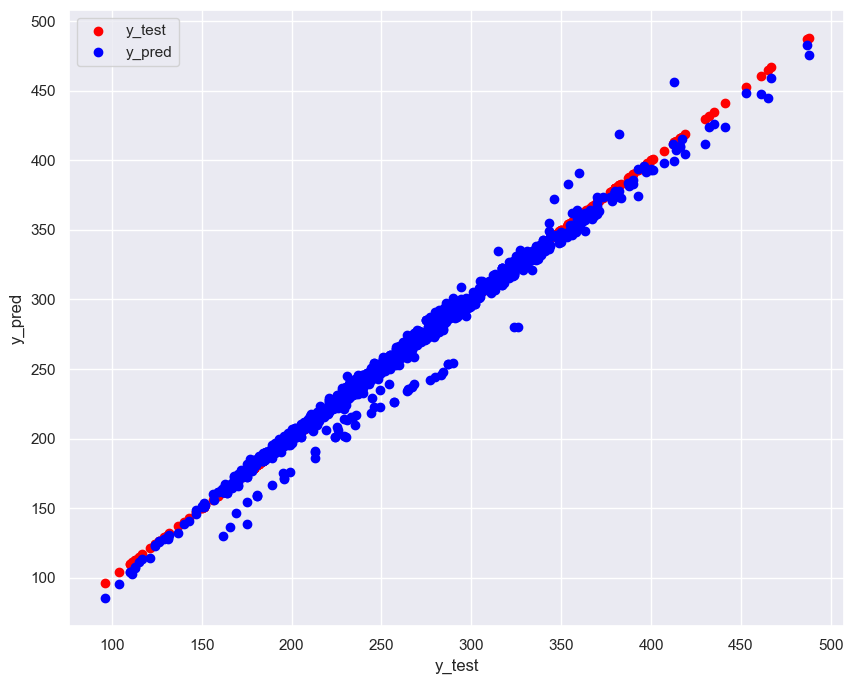

In [119]:
# Scatter plot for y_test in red
plt.scatter(y_test, y_test, c='red', label='y_test')

# Scatter plot for y_pred in blue
plt.scatter(y_test, y_pred, c='blue', label='y_pred')

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()


In [120]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 4.1936
MAE: 2.4628
R2_score: 0.9951


In [121]:
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  186.710  189.0
1  246.160  242.0
2  230.270  234.0
3  309.660  306.0
4  172.173  172.0

In [122]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  2.462852589641437


In [123]:
y_rf_pred.head(10)

pred_values  real_values  diff
0       186.71        189.0  2.29
1       246.16        242.0  4.16
2       230.27        234.0  3.73
3       309.66        306.0  3.66
4       172.17        172.0  0.17
5       293.29        290.0  3.29
6       280.09        285.0  4.91
7       171.56        172.0  0.44
8       167.57        169.0  1.43
9       241.07        244.0  2.93

# Support VECTOR MACHINE

In [124]:
model = LinearSVR()
model.fit(X_train, y_train)
y_svr_pred = model.predict(X_test)
y_svr_pred

array([164.2964225 , 244.88593303, 231.1935003 , ..., 222.83899249,
       296.35657965, 209.28250925])

In [125]:
np.sqrt(mean_squared_error(y_svr_pred,y_test))

7.402651376361944

In [126]:
r2_score(y_svr_pred,y_test)

0.985159349244585

In [127]:
frames = [y_svr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  164.296422  189.0
1  244.885933  242.0
2  231.193500  234.0
3  310.557396  306.0
4  170.826662  172.0

In [128]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))

y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])


print('mean diff: ', abs(y_svr_pred['diff']).mean())

mean diff:  3.5844621513944124


In [129]:
y_svr_pred.head(10)

pred_values  real_values   diff
0       164.30        189.0  24.70
1       244.89        242.0   2.89
2       231.19        234.0   2.81
3       310.56        306.0   4.56
4       170.83        172.0   1.17
5       294.20        290.0   4.20
6       283.08        285.0   1.92
7       170.18        172.0   1.82
8       168.08        169.0   0.92
9       243.16        244.0   0.84

In [130]:
models =['LinReg','LasReg','RidReg','DT', 'RF',"SVR"]

frame = pd.DataFrame(columns={'models':[],'rmse_test':[], 'mae_test':[],'r2_test':[]})




for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Linear Regression',rmse_test,mae_test,r2_test]

    elif models[i] =='LasReg':
        model = Lasso(alpha=0.1)
        model.fit(X_train,y_train)
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Lasso Regression',rmse_test,mae_test,r2_test]

    elif models[i] =='RidReg':
        model = Ridge(alpha=0.1)
        model.fit(X_train,y_train)
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Ridge Regression',rmse_test,mae_test,r2_test]

    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_test,mae_test,r2_test]

    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_test,mae_test,r2_test]

    else :
        models[i] =='SVM'
        model = LinearSVR()
        model.fit(X_train,y_train)
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Support Vector Regression',rmse_test,mae_test,r2_test]

OVERALL PERFORMANCE OF ALL MODELS IN A DATAFRAME

In [131]:
frame

models  rmse_test  mae_test   r2_test
0          Linear Regression   7.064076  4.117095  0.986079
1           Lasso Regression   7.107358  4.145604  0.985907
2           Ridge Regression   7.064139  4.117463  0.986078
3   Decision Tree Regression   5.178462  2.560425  0.992519
4   Random Forest Regression   4.152291  2.452828  0.995190
5  Support Vector Regression   7.404679  3.584952  0.984704